# I. MySQL에서 데이터 로드

In [3]:
#pip install pymysql

In [4]:
#pip install seaborn

In [1]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import config 
from config import DB_CONFIG
import pymysql  
 
# MySQL 연결
conn = pymysql.connect(
     host=DB_CONFIG['host'],
     user=DB_CONFIG['user'],
     password=DB_CONFIG['password'],
     database=DB_CONFIG['database'],
     port=DB_CONFIG['port']
 )
 
car_siren = f"SELECT * FROM merge50_car_siren"
car_horn = f"SELECT * FROM merge50_car_horn"
car_driving = f'SELECT * FROM merge50_car_driving'
motorcycle_horn  = f'SELECT * FROM merge50_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge50_motorcycle_driving'
 
car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 
 
conn.close()

/tmp/ipykernel_3234/30002709.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_3234/30002709.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_3234/30002709.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_3234/30002709.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 D

# II. EDA 및 전처리

In [3]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [4]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [5]:
car_horn_df.head()

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,1.car_horn_87900_1.wav,1.car_horn_87900_1.wav,2.0,58.719,교통소음,자동차,차량경적,116,정상,소형차경적,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,1.car_horn_87964_1.wav,1.car_horn_87964_1.wav,2.0,59.747,교통소음,자동차,차량경적,102,정상,소형차경적,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,1.car_horn_87987_1.wav,1.car_horn_87987_1.wav,2.0,59.217,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,1.car_horn_88000_1.wav,1.car_horn_88000_1.wav,2.0,57.389,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,1.car_horn_88001_1.wav,1.car_horn_88001_1.wav,2.0,58.207,교통소음,자동차,차량경적,122,정상,소형차경적,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427


In [6]:
car_horn_df.iloc[ : ,-50:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,-391.00430,107.641975,64.204640,33.718952,20.630340,13.337987,9.100019,8.873220,9.340549,8.287990,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,-233.66284,87.917620,45.434906,19.435001,9.098841,32.400368,5.817845,9.204194,14.611247,20.294502,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,-318.16153,126.123180,43.729805,-11.429483,-5.223235,13.667998,0.934844,10.497743,2.401143,22.281258,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,-385.20926,140.265410,57.263832,-7.932145,-3.877982,14.155136,6.298158,11.397833,2.566783,15.076704,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,-382.12450,150.004900,61.439040,-17.890905,-7.740589,15.947204,3.806582,7.909450,2.633213,14.426663,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-99.19382,119.270660,-76.342830,14.679804,-26.403290,5.220899,-15.944427,-0.425459,-14.378425,-2.452169,...,1.322109,-1.603073,-0.969422,-0.030491,-3.283236,-4.058084,-2.597992,-0.028827,1.399276,-4.661576
3185,-292.45557,203.069000,-53.426810,37.105576,6.516268,10.316400,11.667080,1.168588,17.977980,5.434537,...,0.412159,-0.795219,-1.426503,-3.167590,-2.035457,0.571453,4.668703,3.238892,-5.142219,-4.995093
3186,-198.79451,201.686460,-87.792480,-11.408583,-14.657739,-5.088332,-0.388612,-13.570362,6.362044,-11.089597,...,-1.205375,0.633744,2.143693,-4.530044,-7.654323,3.844430,9.282047,2.180258,-6.707889,-3.188458
3187,-247.43971,186.716000,-45.675808,47.491760,18.612213,16.028240,8.016017,3.121070,13.013415,4.386095,...,0.659112,-2.346271,-1.647404,-0.503469,0.055166,-0.353136,-0.114590,1.304396,0.613524,-0.592904


In [7]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,1.car_horn_87900_1.wav,1.car_horn_87900_1.wav,2.0,58.719,교통소음,자동차,차량경적,116,정상,소형차경적,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,1.car_horn_87964_1.wav,1.car_horn_87964_1.wav,2.0,59.747,교통소음,자동차,차량경적,102,정상,소형차경적,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,1.car_horn_87987_1.wav,1.car_horn_87987_1.wav,2.0,59.217,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,1.car_horn_88000_1.wav,1.car_horn_88000_1.wav,2.0,57.389,교통소음,자동차,차량경적,112,정상,소형차경적,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,1.car_horn_88001_1.wav,1.car_horn_88001_1.wav,2.0,58.207,교통소음,자동차,차량경적,122,정상,소형차경적,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427


In [8]:
df_combined.iloc[ : ,-50:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
0,-391.00430,107.641975,64.204640,33.718952,20.630340,13.337987,9.100019,8.873220,9.340549,8.287990,...,-1.194056,-0.757743,-2.858810,-5.101422,-0.198150,7.001447,6.203896,-2.862313,-10.336964,-8.593492
1,-233.66284,87.917620,45.434906,19.435001,9.098841,32.400368,5.817845,9.204194,14.611247,20.294502,...,-7.923782,8.347244,-2.440833,-17.408949,-5.891588,22.778133,21.374588,-19.310514,-26.457247,4.794274
2,-318.16153,126.123180,43.729805,-11.429483,-5.223235,13.667998,0.934844,10.497743,2.401143,22.281258,...,-5.953082,1.538178,-0.032047,-10.759938,-10.296665,14.938017,19.099138,-5.256958,-27.792421,-7.377015
3,-385.20926,140.265410,57.263832,-7.932145,-3.877982,14.155136,6.298158,11.397833,2.566783,15.076704,...,-5.018665,2.996135,-0.142866,-8.995171,-4.227169,8.116351,11.163322,-4.992955,-16.359087,-5.441961
4,-382.12450,150.004900,61.439040,-17.890905,-7.740589,15.947204,3.806582,7.909450,2.633213,14.426663,...,-5.330876,2.107300,1.768516,-10.489394,-4.815802,9.592706,12.866017,-3.469832,-20.286922,-6.563427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,-134.79400,167.532800,7.216292,15.758182,18.004358,3.681938,0.359724,0.995183,-16.901344,-5.779024,...,0.148856,2.617479,-0.394380,0.228787,-0.813453,-1.134764,-0.864591,1.662077,-0.654128,0.215723
16152,-214.37556,137.193790,-15.827540,37.033820,-14.496526,32.809563,-7.713640,2.952441,1.501028,0.895649,...,-1.110981,-0.138743,-0.092305,-1.805980,-0.590370,-0.420101,0.680311,-0.311218,-0.129329,-1.615104
16153,-152.88358,141.889480,-68.941160,7.881523,-29.909588,-7.438705,-22.051588,-8.616838,-16.056900,-6.231401,...,-3.755298,-2.622874,-2.315738,-3.121662,-4.175147,-4.395317,-3.526200,-4.390431,-3.562070,-4.967227
16154,-150.00578,138.438980,-60.815014,26.880222,-13.217022,4.150313,-13.740492,-1.927542,-17.932528,-3.447675,...,-2.461309,-0.614726,-2.006001,-1.224681,-1.578365,-1.270139,-1.381948,-0.736268,0.244385,0.520519


# III. 기본 ResNet 모델링

In [9]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-02-28 09:20:26.287621: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 09:20:26.335741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-28 09:20:27.108375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-02-28 09:20:27.950058: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-28 09:20:27.961514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-28 09:20:27.964189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
tf.config.set_visible_devices([], 'GPU')

2025-02-28 09:20:31.390612: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-28 09:20:31.392458: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-28 09:20:31.393965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
!nvidia-smi

Fri Feb 28 09:20:33 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   27C    P0    25W /  70W |    283MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. 데이터 전처리

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터프레임 로드 (예시)
# df_combined = pd.read_csv('your_data.csv')  # 실제 데이터 파일 경로로 변경

# MFCC 특징 사용
X = df_combined.iloc[:, -50:]  # mfcc_1부터 mfcc_50까지 사용
y = df_combined['category_03']  # 레이블 컬럼
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 변환 (ResNet 입력 형태)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encoding
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [13]:
import librosa
import random
import numpy as np

#데이터 증강 함수
def augment_audio(audio, sr, shift_range=0.2, pitch_range=3, noise_level=0.02, time_stretch_range=0.1):
    shift = int(np.random.uniform(low=-shift_range, high=shift_range) * len(audio))
    audio_shifted = np.roll(audio, shift)
    pitch_factor = np.random.uniform(low=-pitch_range, high=pitch_range)
    audio_pitched = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    noise = np.random.normal(0, noise_level, len(audio))
    audio_noisy = audio + noise
    time_stretch_factor = np.random.uniform(low=1-time_stretch_range, high=1+time_stretch_range)
    audio_time_stretched = librosa.effects.time_stretch(audio, rate=time_stretch_factor)
    if len(audio_time_stretched) < len(audio):
        audio_time_stretched = np.pad(audio_time_stretched, (0, len(audio) - len(audio_time_stretched)), 'constant')
    else:
        audio_time_stretched = audio_time_stretched[:len(audio)]
    return audio_shifted, audio_pitched, audio_noisy, audio_time_stretched

# 데이터 증강 적용
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train)):
    audio = X_train[i].flatten()
    label = y_train[i]

    if np.argmax(label) == 4:
        for _ in range(7): # 클래스 4는 7배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif np.argmax(label) == 1:
        for _ in range(5): # 클래스 1은 5배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])
    elif np.argmax(label) == 2:
        for _ in range(3): # 클래스 2는 3배 증강
            audio_shifted, audio_pitched, audio_noisy, audio_time_stretched = augment_audio(audio, sr=22050)
            X_train_augmented.extend([audio_shifted.reshape(-1, 1), audio_pitched.reshape(-1, 1), audio_noisy.reshape(-1, 1), audio_time_stretched.reshape(-1, 1)])
            y_train_augmented.extend([label, label, label, label])

    X_train_augmented.append(audio.reshape(-1, 1))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 데이터 형태 변환 (ResNet 입력 형태)
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)
/home/lab06/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=50
  return f(*args, **kwargs)


## 2. ResNet 모델 정의

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# ResNet 모델 구축
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    if shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 512, stride=2)
    x = GlobalAveragePooling1D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, x)

# 모델 생성 및 컴파일
resnet_model = build_resnet(X_train.shape[1:], num_classes=num_classes)
optimizer = Adam(learning_rate=0.001)
resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## 3. 모델 학습

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

In [15]:
# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(np.argmax(y_train_augmented, axis=1)), y=np.argmax(y_train_augmented, axis=1))
class_weights_dict = dict(enumerate(class_weights))

history = resnet_model.fit(X_train_augmented, y_train_augmented, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr], class_weight=class_weights_dict)

Epoch 1/150


2025-02-28 00:45:03.992944: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4d2005e8d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-02-28 00:45:03.992991: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-02-28 00:45:04.084535: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-28 00:45:04.355886: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4942/4942 [==============================] - 150s 29ms/step - loss: 0.3162 - accuracy: 0.8509 - val_loss: 0.4598 - val_accuracy: 0.8524 - lr: 0.0010
Epoch 2/150
4942/4942 [==============================] - 147s 30ms/step - loss: 0.1910 - accuracy: 0.9061 - val_loss: 0.1991 - val_accuracy: 0.9384 - lr: 0.0010
Epoch 3/150
4942/4942 [==============================] - 147s 30ms/step - loss: 0.1448 - accuracy: 0.9271 - val_loss: 0.2290 - val_accuracy: 0.9322 - lr: 0.0010
Epoch 4/150
4942/4942 [==============================] - 147s 30ms/step - loss: 0.1339 - accuracy: 0.9350 - val_loss: 0.1556 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 5/150
4942/4942 [==============================] - 147s 30ms/step - loss: 0.1122 - accuracy: 0.9462 - val_loss: 0.2289 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 6/150
4942/4942 [==============================] - 147s 30ms/step - loss: 0.0994 - accuracy: 0.9511 - val_loss: 0.1435 - val_accuracy: 0.9564 - lr: 0.0010
Epoch 7/150
4942/4942 [=======================

## 4. 모델 평가

101/101 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       949
           1       0.96      0.96      0.96       915
           2       0.94      0.95      0.94       621
           3       0.99      0.96      0.97       422
           4       0.89      0.92      0.90       325

    accuracy                           0.96      3232
   macro avg       0.95      0.95      0.95      3232
weighted avg       0.96      0.96      0.96      3232

[[917   0  32   0   0]
 [  0 881   2   2  30]
 [ 24   2 589   3   3]
 [  1   8   4 406   3]
 [  0  27   0   0 298]]


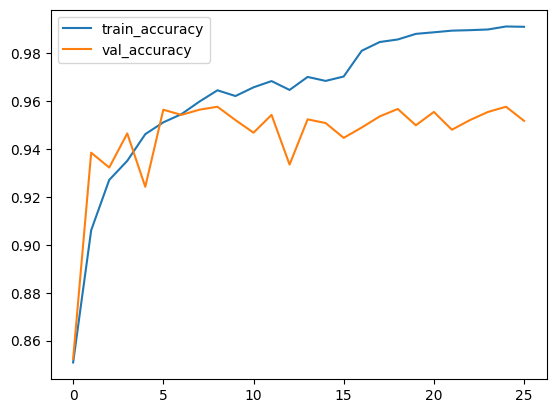

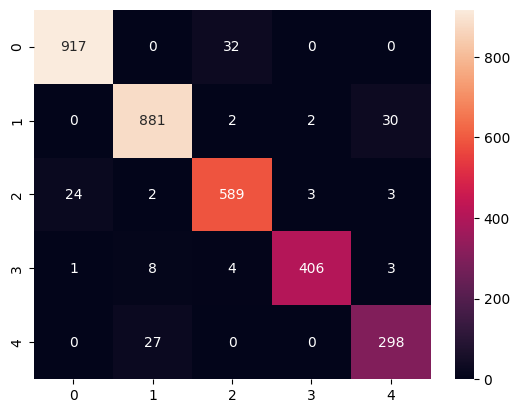

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 평가
y_pred = resnet_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))
print(confusion_matrix(y_true_labels, y_pred_labels))

# 시각화
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d')
plt.show()

In [115]:
y = df_combined['category_03']
print(y.unique())

['차량경적' '차량사이렌' '차량주행음' '이륜차경적' '이륜차주행음']


## 5. 모델 저장

In [17]:
# 모델 저장
resnet_model.save('resnet_model_mfcc50.h5')
print("모델이 resnet_model_mfcc50.h5 파일로 저장되었습니다.")

모델이 resnet_model_mfcc50.h5 파일로 저장되었습니다.


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 6.OOD 테스트 데이터셋 생성

### 1) 교통소음 JSON 데이터 프레임 생성

In [82]:
import os
import json
import pandas as pd

def load_and_flatten_json(root_dir):
    """
    주어진 디렉토리의 모든 JSON 파일을 로드하고 평탄화하여 Pandas DataFrame으로 반환합니다.

    Args:
        root_dir (str): JSON 파일이 포함된 루트 디렉토리 경로

    Returns:
        pd.DataFrame: 평탄화된 JSON 데이터를 포함하는 DataFrame
    """
    data = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.json'):
                filepath = os.path.join(subdir, file)
                with open(filepath, 'r') as f:
                    try:
                        json_data = json.load(f)
                        info = json_data.get('info', {})
                        license_info = json_data.get('license', {})
                        audio = json_data.get('audio', {})
                        environment = json_data.get('environment', {})
                        annotations = json_data.get('annotations', [])  # annotations 필드가 없으면 빈 리스트 반환

                        area_start = None
                        area_end = None
                        category_01 = None
                        category_02 = None
                        category_03 = None
                        labelName = None
                        soundQuality = None
                        decibel = None
                        subCategory = None

                        if annotations:  # annotations 리스트가 비어있지 않은 경우
                            annotation = annotations[0]  # 첫 번째 annotation만 사용
                            area = annotation.get('area', {})
                            area_start = area.get('start')
                            area_end = area.get('end')
                            categories = annotation.get('categories', {})
                            category_01 = categories.get('category_01')
                            category_02 = categories.get('category_02')
                            category_03 = categories.get('category_03')
                            labelName = annotation.get('labelName')
                            soundQuality = annotation.get('soundQuality')
                            decibel = annotation.get('decibel')
                            subCategory = annotation.get('subCategory')

                        # 추출된 정보로 row 생성
                        row = {
                            'area_start': area_start,
                            'area_end': area_end,
                            'category_01': category_01,
                            'category_02': category_02,
                            'category_03': category_03,
                            'decibel': decibel,
                            'labelName': labelName,
                            'soundQuality': soundQuality,
                            'subCategory': subCategory,
                            'bitRate': audio.get('bitRate'),
                            'duration': audio.get('duration'),
                            'fileFormat': audio.get('fileFormat'),
                            'fileName': audio.get('fileName'),
                            'fileSize': audio.get('fileSize'),
                            'recodingType': audio.get('recodingType'),
                            'sampleRate': audio.get('sampleRate'),
                            'acqDevice': environment.get('acqDevice'),
                            'acqMethod': environment.get('acqMethod'),
                            'acqType': environment.get('acqType'),
                            'areaUse': environment.get('areaUse'),
                            'dayNight': environment.get('dayNight'),
                            'direction': environment.get('direction'),
                            'distance': environment.get('distance'),
                            'district': environment.get('district'),
                            'latitude': environment.get('gps', {}).get('latitude'),
                            'longitude': environment.get('gps', {}).get('longitude'),
                            'micClass': environment.get('micClass'),
                            'obstacle': environment.get('obstacle'),
                            'place': environment.get('place'),
                            'recordingTime': environment.get('recordingTime'),
                            'urban': environment.get('urban'),
                            'weather': environment.get('weather'),
                            'contributor': info.get('contributor'),
                            'dateCreated': info.get('dateCreated'),
                            'description': info.get('description'),
                            'uri': info.get('uri'),
                            'version': info.get('version'),
                            'year': info.get('year'),
                            'license_name': license_info.get('name'),
                            'license_url': license_info.get('url'),
                        }
                        data.append(row)
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON file: {filepath} - {e}")
    return pd.DataFrame(data)

# JSON 파일 로드 및 평탄화
root_dir = '/home/ubuntu/data/test_data'  # 실제 경로로 변경
df_json = load_and_flatten_json(root_dir)
print(df_json.head())

   area_start  area_end category_01 category_02 category_03  decibel  \
0         2.0     6.819        교통소음       이륜자동차       이륜차경적       74   
1         2.0    15.869        교통소음       이륜자동차       이륜차경적       70   
2         2.0     3.709        교통소음       이륜자동차       이륜차경적       72   
3         2.0    11.257        교통소음       이륜자동차       이륜차경적       74   
4         2.0     3.713        교통소음       이륜자동차       이륜차경적       70   

             labelName soundQuality subCategory  bitRate  ...  urban weather  \
0  2.이륜자동차_39554_1.wav           정상       이륜차경적  705kbps  ...    고양시      맑음   
1  2.이륜자동차_83873_1.wav           정상       이륜차경적  705kbps  ...    고양시      맑음   
2  2.이륜자동차_83258_1.wav           정상       이륜차경적  705kbps  ...    고양시      맑음   
3  2.이륜자동차_83833_1.wav           정상       이륜차경적  705kbps  ...    고양시      맑음   
4  2.이륜자동차_84352_1.wav           정상       이륜차경적  705kbps  ...    고양시      맑음   

  contributor  dateCreated description                      uri version  year  \
0    

### 2) 교통소음 WAV 데이터 프레임 생성

In [76]:
import librosa
import numpy as np
import os
import pandas as pd
import re
import json

# 한글-영어 매칭 딕셔너리 보완
kor_eng_dict = {
    "자동차": "car",
    "이륜자동차": "motorcycle",
    "경적": "horn",
    "사이렌": "siren",
    "주행음": "driving_sound",
    # 필요한 모든 매핑 추가
}

# 파일명 정규화 함수 수정
def normalize_filename(filename):
    # 확장자 제거
    name, ext = os.path.splitext(filename)

    # 대소문자 변환 및 공백 제거
    name = name.lower().replace(' ', '')

    # 한글-영어 변환 적용
    for kor, eng in kor_eng_dict.items():
        name = name.replace(kor, eng)

    # 정규식으로 고유 ID 추출
    match = re.match(r".*?_(\d+)(?:_\d+)?$", name)
    if match:
        file_id = match.group(1)
    else:
        file_id = None

    return name, ext, file_id

# 매칭 검사 함수 수정
def find_mismatched_files(directory):
    wav_files = {}
    json_files = {}

    # 모든 폴더 순회하며 파일 수집
    for root, _, files in os.walk(directory):
        for file in files:
            name, ext, file_id = normalize_filename(file)
            if file_id is None:
                continue  # ID가 없는 파일은 패스
            file_path = os.path.join(root, file)
            if ext == ".wav":
                wav_files[file_id] = file_path
            elif ext == ".json":
                json_files[file_id] = file_path

    # 매칭되지 않은 파일 찾기
    mismatched_wav = set(wav_files.keys()) - set(json_files.keys())
    mismatched_json = set(json_files.keys()) - set(wav_files.keys())

    return mismatched_wav, mismatched_json, wav_files, json_files

def extract_mfcc(wav_path):
    """
    주어진 WAV 파일 경로에서 MFCC 특징을 추출합니다.
    """
    try:
        audio, sr = librosa.load(wav_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=50)
        mfcc_mean = np.mean(mfcc, axis=1).tolist()
        return mfcc_mean
    except Exception as e:
        print(f"Error processing WAV file: {wav_path} - {e}")
        return None

def load_wav_and_extract_mfcc(root_dir, df_json):
    """
    주어진 디렉토리의 모든 WAV 파일을 로드하고 MFCC 특징을 추출하여 DataFrame에 추가합니다.
    """
    mfcc_data = []
    for index, row in df_json.iterrows():
        wav_filename = row['fileName']
        wav_path = None

        # JSON 파일 이름 정규화
        json_name, _, json_id = normalize_filename(wav_filename)

        # 모든 하위 디렉토리에서 WAV 파일 검색
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                wav_name, _, wav_id = normalize_filename(file)
                if json_id == wav_id and file.endswith('_1.wav'):  # ID가 일치하고 _1로 끝나는 파일
                    wav_path = os.path.join(subdir, file)
                    break

        if wav_path:
            mfcc_features = extract_mfcc(wav_path)
            mfcc_data.append(mfcc_features)
        else:
            print(f"WAV file not found for: {wav_filename}, looking for ID: {json_id}")
            mfcc_data.append(None)

    mfcc_columns = [f'mfcc_{i+1}' for i in range(50)]
    df_mfcc = pd.DataFrame(mfcc_data, columns=mfcc_columns)
    return pd.concat([df_json, df_mfcc], axis=1)

# JSON 파일 로드 및 평탄화 (이전 코드와 동일)
root_dir = '/home/ubuntu/data/test_data'  # 실제 경로로 변경
df_json = load_and_flatten_json(root_dir)

# WAV 파일 로드 및 MFCC 추출
df_final = load_wav_and_extract_mfcc(root_dir, df_json)
print(df_final.head())

# 매칭 검사 실행 (필요하다면 주석 해제)
# directory_path = "/home/ubuntu/data/test_data"
# mismatched_wav, mismatched_json, wav_files, json_files = find_mismatched_files(directory_path)

# 불일치 출력 (필요하다면 주석 해제)
# if mismatched_wav or mismatched_json:
#     print("\n 매칭되지 않은 파일 목록:")

#     if mismatched_wav:
#         print("\n WAV 파일에 대응하는 JSON 파일이 없습니다:")
#         for file_id in mismatched_wav:
#             print(f"  - WAV 파일 ID: {file_id}, 경로: {wav_files[file_id]}")

#     if mismatched_json:
#         print("\n JSON 파일에 대응하는 WAV 파일이 없습니다:")
#         for file_id in mismatched_json:
#             print(f"  - JSON 파일 ID: {file_id}, 경로: {json_files[file_id]}")
# else:
#     print("✅ 모든 파일이 매칭되었습니다!")

   area_start  area_end category_01 category_02 category_03  decibel  \
0         2.0     6.819        교통소음       이륜자동차       이륜차경적       74   
1         2.0    15.869        교통소음       이륜자동차       이륜차경적       70   
2         2.0     3.709        교통소음       이륜자동차       이륜차경적       72   
3         2.0    11.257        교통소음       이륜자동차       이륜차경적       74   
4         2.0     3.713        교통소음       이륜자동차       이륜차경적       70   

             labelName soundQuality subCategory  bitRate  ...   mfcc_41  \
0  2.이륜자동차_39554_1.wav           정상       이륜차경적  705kbps  ... -0.905466   
1  2.이륜자동차_83873_1.wav           정상       이륜차경적  705kbps  ... -6.277379   
2  2.이륜자동차_83258_1.wav           정상       이륜차경적  705kbps  ...  5.929389   
3  2.이륜자동차_83833_1.wav           정상       이륜차경적  705kbps  ...  6.228316   
4  2.이륜자동차_84352_1.wav           정상       이륜차경적  705kbps  ... -2.932086   

    mfcc_42    mfcc_43    mfcc_44    mfcc_45    mfcc_46    mfcc_47    mfcc_48  \
0 -2.771657  -3.069044   1.066370  

### 3) 기타소음 JSON 데이터 프레임 생성

In [77]:
# import os
# import json
# import pandas as pd

# def load_and_flatten_etc_json(root_dir):
#     """
#     주어진 디렉토리의 모든 JSON 파일을 로드하고 평탄화하여 Pandas DataFrame으로 반환합니다.
#     """
#     data = []
#     for file in os.listdir(root_dir):
#         if file.endswith('.json'):
#             filepath = os.path.join(root_dir, file)
#             with open(filepath, 'r') as f:
#                 try:
#                     json_data = json.load(f)
#                     info = json_data.get('info', {})
#                     license_info = json_data.get('license', {})
#                     audio = json_data.get('audio', {})
#                     environment = json_data.get('environment', {})
#                     annotations = json_data.get('annotations', [])  # annotations 필드가 없으면 빈 리스트 반환

#                     # annotations가 리스트인지 확인하고, 첫 번째 요소 추출
#                     annotation = annotations[0] if annotations else {}

#                     area = annotation.get('area', {})
#                     categories = annotation.get('categories', {})

#                     row = {
#                         'area_start': area.get('start'),
#                         'area_end': area.get('end'),
#                         'category_01': categories.get('category_01'),
#                         'category_02': categories.get('category_02'),
#                         'category_03': categories.get('category_03'),
#                         'decibel': annotation.get('decibel'),
#                         'labelName': annotation.get('labelName'),
#                         'soundQuality': annotation.get('soundQuality'),
#                         'subCategory': annotation.get('subCategory'),
#                         'bitRate': audio.get('bitRate'),
#                         'duration': audio.get('duration'),
#                         'fileFormat': audio.get('fileFormat'),
#                         'fileName': audio.get('fileName'),
#                         'fileSize': audio.get('fileSize'),
#                         'recodingType': audio.get('recodingType'),
#                         'sampleRate': audio.get('sampleRate'),
#                         'acqDevice': environment.get('acqDevice'),
#                         'acqMethod': environment.get('acqMethod'),
#                         'acqType': environment.get('acqType'),
#                         'areaUse': environment.get('areaUse'),
#                         'dayNight': environment.get('dayNight'),
#                         'direction': environment.get('direction'),
#                         'distance': environment.get('distance'),
#                         'district': environment.get('district'),
#                         'latitude': environment.get('gps', {}).get('latitude'),
#                         'longitude': environment.get('gps', {}).get('longitude'),
#                         'micClass': environment.get('micClass'),
#                         'obstacle': environment.get('obstacle'),
#                         'place': environment.get('place'),
#                         'recordingTime': environment.get('recordingTime'),
#                         'urban': environment.get('urban'),
#                         'weather': environment.get('weather'),
#                         'contributor': info.get('contributor'),
#                         'dateCreated': info.get('dateCreated'),
#                         'description': info.get('description'),
#                         'uri': info.get('uri'),
#                         'version': info.get('version'),
#                         'year': info.get('year'),
#                         'license_name': license_info.get('name'),
#                         'license_url': license_info.get('url'),
#                     }
#                     data.append(row)
#                 except json.JSONDecodeError as e:
#                     print(f"Error decoding JSON file: {filepath} - {e}")
#     return pd.DataFrame(data)

# root_dir_2 = '/home/ubuntu/data/etc_noise_data_test_03'
# etc_json_df = load_and_flatten_etc_json(root_dir_2)

# print("\n기타 소음 JSON 데이터프레임:")
# print(etc_json_df.head())

In [83]:
import os
import json
import pandas as pd

def load_and_flatten_json(root_dir):
    data = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.json'):
                filepath = os.path.join(subdir, file)
                with open(filepath, 'r', encoding='utf-8') as f:
                    try:
                        json_data = json.load(f)
                        info = json_data.get('info', {})
                        license_info = json_data.get('license', {})
                        audio = json_data.get('audio', {})
                        environment = json_data.get('environment', {})
                        annotations = json_data.get('annotations', [])

                        area_start = None
                        area_end = None
                        category_01 = None
                        category_02 = None
                        category_03 = None
                        labelName = None
                        soundQuality = None
                        decibel = None
                        subCategory = None

                        if annotations and isinstance(annotations, list) and len(annotations) > 0:
                            annotation = annotations[0]
                            if isinstance(annotation, dict):
                                area = annotation.get('area', {})
                                area_start = area.get('start')
                                area_end = area.get('end')
                                categories = annotation.get('categories', {})
                                category_01 = categories.get('category_01')
                                category_02 = categories.get('category_02')
                                category_03 = categories.get('category_03')
                                labelName = annotation.get('labelName')
                                soundQuality = annotation.get('soundQuality')
                                decibel = annotation.get('decibel')
                                subCategory = annotation.get('subCategory')

                        row = {
                            'area_start': area_start,
                            'area_end': area_end,
                            'category_01': category_01,
                            'category_02': category_02,
                            'category_03': category_03,
                            'decibel': decibel,
                            'labelName': labelName,
                            'soundQuality': soundQuality,
                            'subCategory': subCategory,
                            'bitRate': audio.get('bitRate'),
                            'duration': audio.get('duration'),
                            'fileFormat': audio.get('fileFormat'),
                            'fileName': audio.get('fileName'),
                            'fileSize': audio.get('fileSize'),
                            'recodingType': audio.get('recodingType'),
                            'sampleRate': audio.get('sampleRate'),
                            'acqDevice': environment.get('acqDevice'),
                            'acqMethod': environment.get('acqMethod'),
                            'acqType': environment.get('acqType'),
                            'areaUse': environment.get('areaUse'),
                            'dayNight': environment.get('dayNight'),
                            'direction': environment.get('direction'),
                            'distance': environment.get('distance'),
                            'district': environment.get('district'),
                            'latitude': environment.get('gps', {}).get('latitude'),
                            'longitude': environment.get('gps', {}).get('longitude'),
                            'micClass': environment.get('micClass'),
                            'obstacle': environment.get('obstacle'),
                            'place': environment.get('place'),
                            'recordingTime': environment.get('recordingTime'),
                            'urban': environment.get('urban'),
                            'weather': environment.get('weather'),
                            'contributor': info.get('contributor'),
                            'dateCreated': info.get('dateCreated'),
                            'description': info.get('description'),
                            'uri': info.get('uri'),
                            'version': info.get('version'),
                            'year': info.get('year'),
                            'license_name': license_info.get('name'),
                            'license_url': license_info.get('url'),
                        }
                        data.append(row)
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON file: {filepath} - {e}")
    return pd.DataFrame(data)

# JSON 파일 로드 및 평탄화
root_dir_2 = '/home/ubuntu/data/etc_noise_data_test_04'
etc_json_df = load_and_flatten_json(root_dir_2)

print("\n기타 소음 JSON 데이터프레임:")
print(etc_json_df.head())
print(etc_json_df.info())


기타 소음 JSON 데이터프레임:
   area_start  area_end category_01 category_02 category_03  decibel  \
0        4.47    62.220        생활소음          가전         청소기       51   
1        0.35    58.630        생활소음          가전         청소기       79   
2        0.17    30.360        생활소음          가전         청소기      117   
3        0.05    59.000        생활소음          가전         청소기       87   
4        2.00    22.558        생활소음          가전         청소기       49   

          labelName soundQuality subCategory   bitRate  ...  urban weather  \
0  6.가전_76225_1.wav           정상         청소기   705kbps  ...  서울특별시      맑음   
1  6.가전_47589_1.wav           정상         청소기   705kbps  ...  서울특별시      맑음   
2  6.가전_45929_1.wav           정상         청소기  1411kbps  ...  서울특별시      맑음   
3  6.가전_77080_1.wav           정상         청소기  1411kbps  ...  인천광역시      맑음   
4   6.가전_5390_1.wav           정상         청소기  1411kbps  ...  서울특별시      흐림   

  contributor  dateCreated description                      uri version  year 

### 4) 기타소음 WAV 데이터 프레임 생성

In [79]:
# import librosa
# import numpy as np
# import os
# import pandas as pd
# import re
# import json

# # 한글-영어 매핑 딕셔너리 보완
# kor_eng_dict = {
#     "자동차": "car",
#     "이륜자동차": "motorcycle",
#     "경적": "horn",
#     "사이렌": "siren",
#     "주행음": "driving_sound",
#     # 필요한 모든 매핑 추가
# }

# # 파일명 정규화 함수 수정
# def normalize_filename(filename):
#     # 확장자 제거
#     name, ext = os.path.splitext(filename)

#     # 대소문자 변환 및 공백 제거
#     name = name.lower().replace(' ', '')

#     # 한글-영어 변환 적용
#     for kor, eng in kor_eng_dict.items():
#         name = name.replace(kor, eng)

#     # 정규식으로 고유 ID 추출
#     match = re.match(r".*?_(\d+)(?:_\d+)?$", name)
#     if match:
#         file_id = match.group(1)
#     else:
#         file_id = None

#     return name, ext, file_id

# def extract_mfcc(wav_path):
#     """
#     주어진 WAV 파일 경로에서 MFCC 특징을 추출합니다.
#     """
#     try:
#         audio, sr = librosa.load(wav_path, sr=None)
#         mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=50)
#         mfcc_mean = np.mean(mfcc, axis=1).tolist()
#         return mfcc_mean
#     except Exception as e:
#         print(f"Error processing WAV file: {wav_path} - {e}")
#         return None

# def load_wav_and_extract_mfcc(root_dir, df_json):
#     """
#     주어진 디렉토리의 모든 WAV 파일을 로드하고 MFCC 특징을 추출하여 DataFrame에 추가합니다.
#     """
#     mfcc_data = []
#     for index, row in df_json.iterrows():
#         wav_filename = row['fileName']
#         wav_path = os.path.join(root_dir, wav_filename.replace('.wav', '_1.wav'))

#         if os.path.exists(wav_path):
#             mfcc_features = extract_mfcc(wav_path)
#             mfcc_data.append(mfcc_features)
#         else:
#             print(f"WAV file not found: {wav_path}")
#             mfcc_data.append(None)

#     mfcc_columns = [f'mfcc_{i+1}' for i in range(50)]
#     mfcc_df = pd.DataFrame(mfcc_data, columns=mfcc_columns)
#     return pd.concat([df_json, mfcc_df], axis=1)

# root_dir_2 = '/home/ubuntu/data/etc_noise_data_test_03'
# etc_mfcc_df = load_wav_and_extract_mfcc(root_dir_2, etc_json_df)

# print("\n기타 소음 MFCC 데이터프레임:")
# print(etc_mfcc_df.head())

In [84]:
import librosa
import numpy as np
import os
import pandas as pd
import re
import json

# 한글-영어 매칭 딕셔너리 보완
kor_eng_dict = {
    "자동차": "car",
    "이륜자동차": "motorcycle",
    "경적": "horn",
    "사이렌": "siren",
    "주행음": "driving_sound",
    # 필요한 모든 매핑 추가
}

# 파일명 정규화 함수 수정
def normalize_filename(filename):
    # 확장자 제거
    name, ext = os.path.splitext(filename)

    # 대소문자 변환 및 공백 제거
    name = name.lower().replace(' ', '')

    # 한글-영어 변환 적용
    for kor, eng in kor_eng_dict.items():
        name = name.replace(kor, eng)

    # 정규식으로 고유 ID 추출
    match = re.match(r".*?_(\d+)(?:_\d+)?$", name)
    if match:
        file_id = match.group(1)
    else:
        file_id = None

    return name, ext, file_id

# 매칭 검사 함수 수정
def find_mismatched_files(directory):
    wav_files = {}
    json_files = {}

    # 모든 폴더 순회하며 파일 수집
    for root, _, files in os.walk(directory):
        for file in files:
            name, ext, file_id = normalize_filename(file)
            if file_id is None:
                continue  # ID가 없는 파일은 패스
            file_path = os.path.join(root, file)
            if ext == ".wav":
                wav_files[file_id] = file_path
            elif ext == ".json":
                json_files[file_id] = file_path

    # 매칭되지 않은 파일 찾기
    mismatched_wav = set(wav_files.keys()) - set(json_files.keys())
    mismatched_json = set(json_files.keys()) - set(wav_files.keys())

    return mismatched_wav, mismatched_json, wav_files, json_files

def extract_mfcc(wav_path):
    """
    주어진 WAV 파일 경로에서 MFCC 특징을 추출합니다.
    """
    try:
        audio, sr = librosa.load(wav_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=50)
        mfcc_mean = np.mean(mfcc, axis=1).tolist()
        return mfcc_mean
    except Exception as e:
        print(f"Error processing WAV file: {wav_path} - {e}")
        return None

def load_wav_and_extract_mfcc(root_dir, df_json):
    """
    주어진 디렉토리의 모든 WAV 파일을 로드하고 MFCC 특징을 추출하여 DataFrame에 추가합니다.
    """
    mfcc_data = []
    for index, row in df_json.iterrows():
        wav_filename = row['fileName']
        wav_path = None

        # JSON 파일 이름 정규화
        json_name, _, json_id = normalize_filename(wav_filename)

        # 모든 하위 디렉토리에서 WAV 파일 검색
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                wav_name, _, wav_id = normalize_filename(file)
                if json_id == wav_id and file.endswith('_1.wav'):  # ID가 일치하고 _1로 끝나는 파일
                    wav_path = os.path.join(subdir, file)
                    break

        if wav_path:
            mfcc_features = extract_mfcc(wav_path)
            mfcc_data.append(mfcc_features)
        else:
            print(f"WAV file not found for: {wav_filename}, looking for ID: {json_id}")
            mfcc_data.append(None)

    mfcc_columns = [f'mfcc_{i+1}' for i in range(50)]
    df_mfcc = pd.DataFrame(mfcc_data, columns=mfcc_columns)
    return pd.concat([df_json, df_mfcc], axis=1)

# JSON 파일 로드 및 평탄화
root_dir_2 = '/home/ubuntu/data/etc_noise_data_test_04'
etc_json_df = load_and_flatten_json(root_dir_2)

# WAV 파일 로드 및 MFCC 추출
df_final_2 = load_wav_and_extract_mfcc(root_dir_2, etc_json_df)
print(df_final_2.head())

   area_start  area_end category_01 category_02 category_03  decibel  \
0        4.47    62.220        생활소음          가전         청소기       51   
1        0.35    58.630        생활소음          가전         청소기       79   
2        0.17    30.360        생활소음          가전         청소기      117   
3        0.05    59.000        생활소음          가전         청소기       87   
4        2.00    22.558        생활소음          가전         청소기       49   

          labelName soundQuality subCategory   bitRate  ...   mfcc_41  \
0  6.가전_76225_1.wav           정상         청소기   705kbps  ... -1.863527   
1  6.가전_47589_1.wav           정상         청소기   705kbps  ... -3.491574   
2  6.가전_45929_1.wav           정상         청소기  1411kbps  ... -0.153434   
3  6.가전_77080_1.wav           정상         청소기  1411kbps  ... -2.305894   
4   6.가전_5390_1.wav           정상         청소기  1411kbps  ...  4.008397   

    mfcc_42   mfcc_43   mfcc_44   mfcc_45   mfcc_46   mfcc_47   mfcc_48  \
0  8.110558  0.582024 -3.542713 -1.612815  3.155624 -

### 5) 최종 테스트 데이터 생성

In [85]:
# 교통 소음 데이터프레임 (df_final)과 기타 소음 데이터프레임 (df_final_2) 합치기
combined_df = pd.concat([df_final, df_final_2], ignore_index=True, sort=False)

print("\n결합된 데이터프레임:")
print(combined_df.head())


결합된 데이터프레임:
   area_start  area_end category_01 category_02 category_03  decibel  \
0         2.0     6.819        교통소음       이륜자동차       이륜차경적       74   
1         2.0    15.869        교통소음       이륜자동차       이륜차경적       70   
2         2.0     3.709        교통소음       이륜자동차       이륜차경적       72   
3         2.0    11.257        교통소음       이륜자동차       이륜차경적       74   
4         2.0     3.713        교통소음       이륜자동차       이륜차경적       70   

             labelName soundQuality subCategory  bitRate  ...   mfcc_41  \
0  2.이륜자동차_39554_1.wav           정상       이륜차경적  705kbps  ... -0.905466   
1  2.이륜자동차_83873_1.wav           정상       이륜차경적  705kbps  ... -6.277379   
2  2.이륜자동차_83258_1.wav           정상       이륜차경적  705kbps  ...  5.929389   
3  2.이륜자동차_83833_1.wav           정상       이륜차경적  705kbps  ...  6.228316   
4  2.이륜자동차_84352_1.wav           정상       이륜차경적  705kbps  ... -2.932086   

    mfcc_42    mfcc_43    mfcc_44    mfcc_45    mfcc_46    mfcc_47    mfcc_48  \
0 -2.771657  -3.069044

### 6) NULL 값 검증

In [86]:
# 각 열의 null 값 개수 확인
print(combined_df.isnull().sum())

# 데이터프레임 전체에 null 값 있는지 확인
print(combined_df.isnull().values.any())

area_start     0
area_end       0
category_01    0
category_02    0
category_03    0
              ..
mfcc_46        0
mfcc_47        0
mfcc_48        0
mfcc_49        0
mfcc_50        0
Length: 90, dtype: int64
False


In [87]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_start     3757 non-null   float64
 1   area_end       3757 non-null   float64
 2   category_01    3757 non-null   object 
 3   category_02    3757 non-null   object 
 4   category_03    3757 non-null   object 
 5   decibel        3757 non-null   int64  
 6   labelName      3757 non-null   object 
 7   soundQuality   3757 non-null   object 
 8   subCategory    3757 non-null   object 
 9   bitRate        3757 non-null   object 
 10  duration       3757 non-null   float64
 11  fileFormat     3757 non-null   object 
 12  fileName       3757 non-null   object 
 13  fileSize       3757 non-null   int64  
 14  recodingType   3757 non-null   object 
 15  sampleRate     3757 non-null   object 
 16  acqDevice      3757 non-null   object 
 17  acqMethod      3757 non-null   object 
 18  acqType 

In [88]:
import pandas as pd

# combined_df: 테스트 데이터프레임
# df_combined: 훈련 데이터프레임

# 1. 훈련 데이터셋의 열 이름 가져오기
train_cols = df_combined.columns.tolist()

# 2. 테스트 데이터셋에서 훈련 데이터셋과 동일한 열 선택
test_cols = [col for col in train_cols if col in combined_df.columns]
combined_df = combined_df[test_cols]

# 3. 열 순서 맞추기
combined_df = combined_df[train_cols]

# 4. 추가된 열 제거 (선택 사항)
test_only_cols = [col for col in combined_df.columns if col not in df_combined.columns]
combined_df = combined_df.drop(columns=test_only_cols)

# 결과 확인
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3757 non-null   object 
 1   labelName      3757 non-null   object 
 2   area_start     3757 non-null   float64
 3   area_end       3757 non-null   float64
 4   category_01    3757 non-null   object 
 5   category_02    3757 non-null   object 
 6   category_03    3757 non-null   object 
 7   decibel        3757 non-null   int64  
 8   soundQuality   3757 non-null   object 
 9   subCategory    3757 non-null   object 
 10  bitRate        3757 non-null   object 
 11  duration       3757 non-null   float64
 12  fileFormat     3757 non-null   object 
 13  fileSize       3757 non-null   int64  
 14  recodingType   3757 non-null   object 
 15  sampleRate     3757 non-null   object 
 16  acqDevice      3757 non-null   object 
 17  acqMethod      3757 non-null   object 
 18  acqType 

### 7) CSV 파일로 저장

In [89]:
# 데이터프레임을 CSV 파일로 저장
combined_df.to_csv('combined_test_data_200.csv', index=False, encoding='utf-8-sig')

print("데이터프레임이 combined_test_data_200.csv 파일로 저장되었습니다.")

데이터프레임이 combined_test_data_200.csv 파일로 저장되었습니다.


### 8) 테스트 데이터 샘플링

In [186]:
combined_df = pd.read_csv('combined_test_data_200.csv')

In [187]:
combined_df.tail(5)

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_41,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50
3752,7.동물_21233.wav,7.동물_21233_1.wav,2.00,22.464,생활소음,동물,개,73,정상,개,...,0.163678,0.978441,0.545665,0.214506,-0.904289,-0.905006,-1.461157,-1.331534,-1.081596,-0.768962
3753,7.동물_49714.wav,7.동물_49714_1.wav,2.00,12.311,생활소음,동물,개,80,정상,개,...,0.136369,-0.835893,1.483713,0.096528,0.914111,-0.760042,-0.644359,1.176192,0.465000,1.438253
3754,7.동물_50077.wav,7.동물_50077_1.wav,2.00,26.916,생활소음,동물,개,52,정상,개,...,-0.873561,-1.316911,-1.918315,-0.122976,0.112075,-0.384172,0.718058,1.504387,0.550436,0.147882
3755,7.동물_49929.wav,7.동물_49929_1.wav,2.00,29.847,생활소음,동물,개,118,정상,개,...,-0.692830,-0.751875,-0.272646,0.166117,-0.828950,-1.689774,-1.097977,-1.704201,-1.078815,-1.519851
3756,7.동물_93791.wav,7.동물_93791_1.wav,2.55,5.780,생활소음,동물,개,121,정상,개,...,1.255837,1.948457,1.149736,-0.214424,-0.473664,-0.758053,-1.192869,-2.213222,-2.408570,-2.331245


In [188]:
print(combined_df['category_03'].value_counts())

category_03
이륜차경적     519
이륜차주행음    498
헬리콥터      435
차량경적      399
기차        281
고양이       274
차량사이렌     249
지하철       245
차량주행음     227
개         217
비행기       191
세탁기       120
청소기       102
Name: count, dtype: int64


In [189]:
# import pandas as pd

# sample_count = 100  # 원하는 샘플 개수

# df_balanced_odd = combined_df.groupby('category_03').apply(lambda x: x.sample(sample_count, replace=True)).reset_index(drop=True)

In [190]:
# print(df_balanced_odd['category_03'].value_counts())

In [191]:
# df_balanced_odd에서 실제 라벨을 기준으로 정상 데이터와 기타 소음 라벨링
valid_labels = ['차량경적', '차량주행음', '이륜차경적', '이륜차주행음', '차량사이렌']  # 정상 라벨

# 'category_03' 컬럼이 정상 라벨이면 그대로 두고, 그렇지 않으면 '기타소음'으로 설정
df_balanced_odd['ood_label'] = df_balanced_odd['category_03'].apply(lambda x: x if x in valid_labels else '기타소음')

df_balanced_odd.head(5)

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50,ood_label
0,7.동물_50409.wav,7.동물_50409_1.wav,2.0,33.234,생활소음,동물,개,69,정상,개,...,-1.707806,-0.943259,-0.725834,0.061347,0.865882,1.288176,2.182338,1.883611,1.080596,기타소음
1,7.동물_92760.wav,7.동물_92760_1.wav,2.0,11.801,생활소음,동물,개,84,정상,개,...,-1.523839,-1.694556,-0.130893,0.677313,-0.285811,-1.596709,-1.590276,-0.500386,-0.115253,기타소음
2,7.동물_49785.wav,7.동물_49785_1.wav,2.0,12.215,생활소음,동물,개,129,정상,개,...,-0.800354,-1.064046,-0.682028,-0.334695,-0.766739,-2.114233,-2.280520,-1.571544,-1.858536,기타소음
3,7.동물_49785.wav,7.동물_49785_1.wav,2.0,12.215,생활소음,동물,개,129,정상,개,...,-0.800354,-1.064046,-0.682028,-0.334695,-0.766739,-2.114233,-2.280520,-1.571544,-1.858536,기타소음
4,7.동물_50762.wav,7.동물_50762_1.wav,2.0,12.162,생활소음,동물,개,117,노이즈,개,...,-0.805295,-3.251445,0.267777,0.904959,-2.539601,-0.985354,-0.209353,-1.123841,-0.822561,기타소음


In [192]:
df_balanced_odd.columns[-51:-1]

Index(['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19',
       'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23', 'mfcc_24', 'mfcc_25',
       'mfcc_26', 'mfcc_27', 'mfcc_28', 'mfcc_29', 'mfcc_30', 'mfcc_31',
       'mfcc_32', 'mfcc_33', 'mfcc_34', 'mfcc_35', 'mfcc_36', 'mfcc_37',
       'mfcc_38', 'mfcc_39', 'mfcc_40', 'mfcc_41', 'mfcc_42', 'mfcc_43',
       'mfcc_44', 'mfcc_45', 'mfcc_46', 'mfcc_47', 'mfcc_48', 'mfcc_49',
       'mfcc_50'],
      dtype='object')

In [193]:
df_balanced_odd['category_03']

0          개
1          개
2          개
3          개
4          개
        ... 
1295    헬리콥터
1296    헬리콥터
1297    헬리콥터
1298    헬리콥터
1299    헬리콥터
Name: category_03, Length: 1300, dtype: object

In [194]:
import pandas as pd

# 샘플링할 레이블과 개수 정의
label_counts = {
    '이륜차경적': 100,
    '이륜차주행음': 100,
    '차량경적': 100,
    '차량사이렌': 100,
    '차량주행음': 100,
    '기타소음': 5  # '기타소음' 레이블 개수 조정
}

# 교통 소음 레이블 정의
traffic_noise_labels = list(label_counts.keys())

# 샘플링된 데이터를 저장할 리스트 초기화
sampled_dfs = []

# 교통 소음 레이블 샘플링
for label, count in label_counts.items():
    label_df = df_balanced_odd[df_balanced_odd['ood_label'] == label]
    sampled_label_df = label_df.sample(n=count, random_state=42)
    sampled_dfs.append(sampled_label_df)

# 교통 소음 외 레이블 샘플링 (총 100개)
other_labels = df_balanced_odd['category_03'].unique()
other_labels = [label for label in other_labels if label not in traffic_noise_labels]

other_dfs = []
for label in other_labels:
    label_df = df_balanced_odd[df_balanced_odd['category_03'] == label]
    if not label_df.empty:
        other_dfs.append(label_df)

other_df = pd.concat(other_dfs)
if not other_df.empty:
    other_sampled_df = other_df.sample(n=100, random_state=42)
    sampled_dfs.append(other_sampled_df)

# 샘플링된 데이터프레임을 하나로 합치기
df_balanced_odd_sampled = pd.concat(sampled_dfs)

# 결과 확인
print(df_balanced_odd_sampled['ood_label'].value_counts())
print(df_balanced_odd_sampled['category_03'].value_counts())

ood_label
기타소음      105
이륜차경적     100
이륜차주행음    100
차량경적      100
차량사이렌     100
차량주행음     100
Name: count, dtype: int64
category_03
이륜차경적     100
이륜차주행음    100
차량경적      100
차량사이렌     100
차량주행음     100
개          18
청소기        17
비행기        16
지하철        14
헬리콥터       14
기차         10
세탁기         8
고양이         8
Name: count, dtype: int64


In [195]:
df_balanced_odd_sampled.head(5)

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_42,mfcc_43,mfcc_44,mfcc_45,mfcc_46,mfcc_47,mfcc_48,mfcc_49,mfcc_50,ood_label
583,2.이륜자동차_62321.wav,2.이륜자동차_62321_1.wav,2.0,3.073,교통소음,이륜자동차,이륜차경적,70,정상,이륜차경적,...,4.115668,-0.501834,5.925655,9.074096,12.989701,1.267592,-11.246548,-10.492962,3.902161,이륜차경적
553,2.이륜자동차_62626.wav,2.이륜자동차_62626_1.wav,2.0,3.064,교통소음,이륜자동차,이륜차경적,87,정상,이륜차경적,...,7.076198,4.570290,-8.987755,-19.556229,8.804268,7.241942,-8.736174,-25.470303,-4.186385,이륜차경적
570,2.이륜자동차_84469.wav,2.이륜자동차_84469_1.wav,2.0,3.515,교통소음,이륜자동차,이륜차경적,68,정상,이륜차경적,...,6.032583,16.107279,3.691194,4.933182,17.471859,5.361421,-11.993928,-15.169086,1.618256,이륜차경적
545,2.이륜자동차_62602.wav,2.이륜자동차_62602_1.wav,2.0,3.757,교통소음,이륜자동차,이륜차경적,69,정상,이륜차경적,...,6.946306,0.712221,-5.685188,-12.422381,5.176677,2.937608,-7.462348,-13.261366,-2.204949,이륜차경적
544,2.이륜자동차_62922.wav,2.이륜자동차_62922_1.wav,2.0,3.528,교통소음,이륜자동차,이륜차경적,73,정상,이륜차경적,...,14.795301,6.779782,0.598929,18.789545,27.470959,5.967506,-15.882281,-19.689087,-2.366837,이륜차경적


## 7. OOD 탐지 함수 추가 및 최종 평가

### 1) 디버깅

In [107]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 모델 불러오기
model = load_model('resnet_model_mfcc50.h5')

# feature로 사용할 MFCC 데이터와 라벨을 준비합니다.
# df_balanced_odd의 마지막 50개 컬럼을 선택하여 MFCC 컬럼으로 사용
mfcc_columns = df_balanced_odd.columns[-51:-1]  # 마지막 50개의 컬럼
X_test = df_balanced_odd[mfcc_columns].values  # MFCC 값

# 실제 라벨 (category_03)
y_true = df_balanced_odd['category_03'].values

# 라벨 인코딩: 정상 소음과 기타 소음으로 변환
valid_labels = ['차량경적', '차량주행음', '이륜차경적', '이륜차주행음' ,'차량사이렌']  # 정상 라벨
df_balanced_odd['ood_label'] = df_balanced_odd['category_03'].apply(lambda x: 0 if x in valid_labels else 1)
y_true_ood = df_balanced_odd['ood_label'].values

# 예측 수행
y_pred_prob = model.predict(X_test)  # 확률값 (예측 확률)

# 임계값 설정 (예: 0.8)
threshold = 0.8

# 임계값을 기준으로 예측값을 0 또는 1로 변환
y_pred_ood = (y_pred_prob[:, 1] >= threshold).astype(int)  # 1번 클래스(기타 소음)에 대해 확률이 0.8 이상이면 '기타 소음'

# 혼동 행렬과 분류 성능 리포트 출력
conf_matrix = confusion_matrix(y_true_ood, y_pred_ood)
print("혼동 행렬:")
print(conf_matrix)

print("\n분류 성능 리포트:")
print(classification_report(y_true_ood, y_pred_ood))

# 라벨별 오분류 결과 확인
unique_labels = df_balanced_odd['category_03'].unique()
for label in unique_labels:
    print(f"\n{label}에 대한 예측 결과:")
    label_data = df_balanced_odd[df_balanced_odd['category_03'] == label]
    true_label = label_data['ood_label'].values
    pred_label = y_pred_ood[:len(label_data)]  # 예측 결과를 맞춰주기
    cm_label = confusion_matrix(true_label, pred_label)
    print(cm_label)


41/41 [==============================] - 1s 8ms/step
혼동 행렬:
[[397 103]
 [487 313]]

분류 성능 리포트:
              precision    recall  f1-score   support

           0       0.45      0.79      0.57       500
           1       0.75      0.39      0.51       800

    accuracy                           0.55      1300
   macro avg       0.60      0.59      0.54      1300
weighted avg       0.64      0.55      0.54      1300


개에 대한 예측 결과:
[[ 0  0]
 [65 35]]

고양이에 대한 예측 결과:
[[ 0  0]
 [65 35]]

기차에 대한 예측 결과:
[[ 0  0]
 [65 35]]

비행기에 대한 예측 결과:
[[ 0  0]
 [65 35]]

세탁기에 대한 예측 결과:
[[ 0  0]
 [65 35]]

이륜차경적에 대한 예측 결과:
[[65 35]
 [ 0  0]]

이륜차주행음에 대한 예측 결과:
[[65 35]
 [ 0  0]]

지하철에 대한 예측 결과:
[[ 0  0]
 [65 35]]

차량경적에 대한 예측 결과:
[[65 35]
 [ 0  0]]

차량사이렌에 대한 예측 결과:
[[65 35]
 [ 0  0]]

차량주행음에 대한 예측 결과:
[[65 35]
 [ 0  0]]

청소기에 대한 예측 결과:
[[ 0  0]
 [65 35]]

헬리콥터에 대한 예측 결과:
[[ 0  0]
 [65 35]]


In [119]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# 데이터 준비
X = df_combined.iloc[:, -50:]  # MFCC 특징
y = df_combined['category_03']  # 레이블 컬럼
y = y.astype('category').cat.codes

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 형태 변환 (ResNet 입력 형태)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encoding
num_classes = len(np.unique(y)) + 1  # 5 classes + 1 for OOD
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# 모델 불러오기
resnet_model = load_model('resnet_model_mfcc50.h5')

# 예측을 통해 확률 값 계산
y_pred = resnet_model.predict(X_test)

# OOD 탐지: 확률이 낮으면 '기타 소음'으로 분류
ood_threshold = 0.9  # 임계값 설정 (예: 70%)
y_pred_labels = np.argmax(y_pred, axis=1)

# OOD 예측 추가
y_pred_labels_ood = np.where(np.max(y_pred, axis=1) < ood_threshold, 5, y_pred_labels)  # 5는 '기타 소음'의 클래스

# OOD 라벨 변환
y_true_labels = np.argmax(y_test, axis=1)
y_true_labels_ood = np.where(np.max(y_test, axis=1) < ood_threshold, 5, y_true_labels)  # 5는 '기타 소음'

# Classification Report
print("Classification Report:")
print(classification_report(y_true_labels_ood, y_pred_labels_ood, target_names=['Vehicle Horn', 'Vehicle Siren', 'Vehicle Running Sound', 'Motorcycle Horn', 'Motorcycle Running Sound', 'Other Noise']))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true_labels_ood, y_pred_labels_ood)
print(cm)

# Accuracy Plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Vehicle Horn', 'Vehicle Siren', 'Vehicle Running Sound', 'Motorcycle Horn', 'Motorcycle Running Sound', 'Other Noise'], yticklabels=['Vehicle Horn', 'Vehicle Siren', 'Vehicle Running Sound', 'Motorcycle Horn', 'Motorcycle Running Sound', 'Other Noise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

101/101 [==============================] - 1s 8ms/step
Classification Report:
                          precision    recall  f1-score   support

            Vehicle Horn       1.00      0.93      0.97       949
           Vehicle Siren       0.98      0.91      0.94       915
   Vehicle Running Sound       0.99      0.81      0.89       621
         Motorcycle Horn       1.00      0.94      0.97       422
Motorcycle Running Sound       0.95      0.86      0.90       325
             Other Noise       0.00      0.00      0.00         0

                accuracy                           0.90      3232
               macro avg       0.82      0.74      0.78      3232
            weighted avg       0.99      0.90      0.94      3232

Confusion Matrix:
[[887   0   6   0   0  56]
 [  0 832   0   0  13  70]
 [  1   0 506   1   1 112]
 [  0   3   0 395   0  24]
 [  0  13   0   0 278  34]
 [  0   0   0   0   0   0]]


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'history' is not defined

19/19 [==============================] - 0s 8ms/step
Classification Report:
                          precision    recall  f1-score   support

             Other Noise       0.05      0.05      0.05       105
         Motorcycle Horn       0.01      0.01      0.01       100
Motorcycle Running Sound       0.00      0.00      0.00       100
            Vehicle Horn       0.00      0.00      0.00       100
           Vehicle Siren       0.02      0.02      0.02       100
   Vehicle Running Sound       0.00      0.00      0.00       100

                accuracy                           0.01       605
               macro avg       0.01      0.01      0.01       605
            weighted avg       0.01      0.01      0.01       605

Confusion Matrix:
[[  5  46   9  17  28   0]
 [ 96   1   3   0   0   0]
 [  0 100   0   0   0   0]
 [  4   1  95   0   0   0]
 [  0   4   0  94   2   0]
 [  0   6   0   0  94   0]]


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

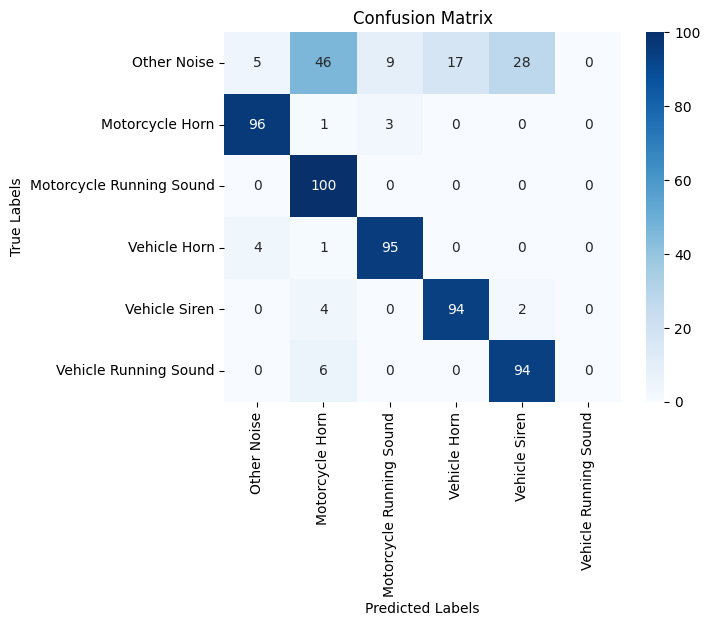

In [216]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 데이터 준비
mfcc_columns = df_balanced_odd_sampled.columns[-51:-1]
X_test_ood = df_balanced_odd_sampled[mfcc_columns].values
y_true_ood_str = df_balanced_odd_sampled['ood_label'].values

# 레이블 순서 지정
labels = ['기타소음', '이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음']
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(labels)  # 클래스 순서 지정
y_true_ood = label_encoder.transform(y_true_ood_str)

# 모델 예측
y_pred_combined = resnet_model.predict(X_test_ood)

# 모델의 클래스 순서 지정 (모델 학습 시 사용한 클래스 순서와 동일하게 설정)
model_classes = labels  # 혹은 모델 학습 시의 클래스 순서 리스트를 사용
class_indices = [labels.index(cls) for cls in model_classes]

# 예측 결과 재배열 (만약 모델 클래스 순서가 다를 경우에만)
# y_pred_combined_reordered = y_pred_combined[:, class_indices]

# y_pred_labels_combined = np.argmax(y_pred_combined_reordered, axis=1)
y_pred_labels_combined = np.argmax(y_pred_combined, axis=1)  # 모델 클래스 순서가 일치한다면 그대로 사용

# 불확실성 기반 OOD 탐지
pred_variance = np.var(y_pred_combined, axis=1)
ood_threshold = 0.8  # 임계값 조정

# 분산이 임계값 이상인 경우 '기타소음' (0번 클래스)으로 분류
y_pred_labels_ood_combined = np.where(pred_variance > ood_threshold, 0, y_pred_labels_combined)

# 실제 레이블은 그대로 사용
y_true_labels_combined = y_true_ood

# 영어 레이블 매핑
label_mapping = {
    '기타소음': 'Other Noise',
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound'
}
english_labels = [label_mapping[label] for label in label_encoder.classes_]

# Classification Report
print("Classification Report:")
print(classification_report(y_true_labels_combined, y_pred_labels_ood_combined, target_names=english_labels))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true_labels_combined, y_pred_labels_ood_combined)
print(cm)

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [196]:
df_balanced_odd_sampled['ood_label'].value_counts()

ood_label
기타소음      105
이륜차경적     100
이륜차주행음    100
차량경적      100
차량사이렌     100
차량주행음     100
Name: count, dtype: int64

In [200]:
import numpy as np

# 실제 라벨과 예측 라벨 출력
print("Unique True Labels:", np.unique(y_true_ood))
print("Unique Predicted Labels:", np.unique(np.argmax(y_pred_combined, axis=1)))


Unique True Labels: [0 1 2 3 4 5]
Unique Predicted Labels: [0 1 2 3 4]


In [201]:
import numpy as np

# True Labels와 Predicted Labels이 어떻게 되어 있는지 확인
print("True Labels:", np.unique(y_true))  # 실제 정답 라벨
print("Predicted Labels:", np.unique(y_pred))  # 모델이 예측한 라벨

# 라벨이 숫자로 저장된 경우 (예: 0,1,2,3,4,5)
print("Unique True Label Numbers:", np.unique(y_true_ood))  
print("Unique Predicted Label Numbers:", np.unique(np.argmax(y_pred_combined, axis=1)))

# 영어 라벨이 어떻게 매칭되어 있는지 확인
if 'label_encoder' in globals():
    print("Label Mapping (Index -> Class):")
    for i, label in enumerate(label_encoder.classes_):
        print(f"{i} -> {label}")  # 숫자 -> 영어 라벨 매핑 확인


True Labels: [0 1]
Predicted Labels: [2.4309613e-29 5.5583540e-26 1.7494122e-23 ... 9.9999964e-01 9.9999976e-01
 1.0000000e+00]
Unique True Label Numbers: [0 1 2 3 4 5]
Unique Predicted Label Numbers: [0 1 2 3 4]
Label Mapping (Index -> Class):
0 -> 기타소음
1 -> 이륜차경적
2 -> 이륜차주행음
3 -> 차량경적
4 -> 차량사이렌
5 -> 차량주행음


In [202]:
print("y_true 원본:", y_true[:20])  # 처음 20개 데이터 확인 (제대로 저장되었는지)
print("y_true 고유값:", np.unique(y_true))  # 고유값 확인 (0~5가 있는지)

# 혹시 True Labels가 이진 분류로 변환된 게 아닌지 확인
if set(np.unique(y_true)) == {0, 1}:
    print("⚠️ True Labels가 이진 분류 형태로 저장된 것 같아요. 원본 데이터를 다시 확인해 주세요!")

y_true 원본: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_true 고유값: [0 1]
⚠️ True Labels가 이진 분류 형태로 저장된 것 같아요. 원본 데이터를 다시 확인해 주세요!


In [203]:
# 원본 데이터셋에서 라벨 확인 (CSV, JSON, NumPy 배열 등)
print("y_train 고유값 확인:", np.unique(y_train))  # 훈련 데이터 라벨 확인
print("y_test 고유값 확인:", np.unique(y_test))  # 테스트 데이터 라벨 확인

y_train 고유값 확인: [0. 1.]
y_test 고유값 확인: [0. 1.]


Classification Report:
                          precision    recall  f1-score   support

             Other Noise       0.05      0.05      0.05       105
         Motorcycle Horn       0.01      0.01      0.01       100
Motorcycle Running Sound       0.00      0.00      0.00       100
            Vehicle Horn       0.00      0.00      0.00       100
           Vehicle Siren       0.02      0.02      0.02       100
   Vehicle Running Sound       0.00      0.00      0.00       100

                accuracy                           0.01       605
               macro avg       0.01      0.01      0.01       605
            weighted avg       0.01      0.01      0.01       605

Confusion Matrix:
[[  5  46   9  17  28   0]
 [ 96   1   3   0   0   0]
 [  0 100   0   0   0   0]
 [  4   1  95   0   0   0]
 [  0   4   0  94   2   0]
 [  0   6   0   0  94   0]]


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

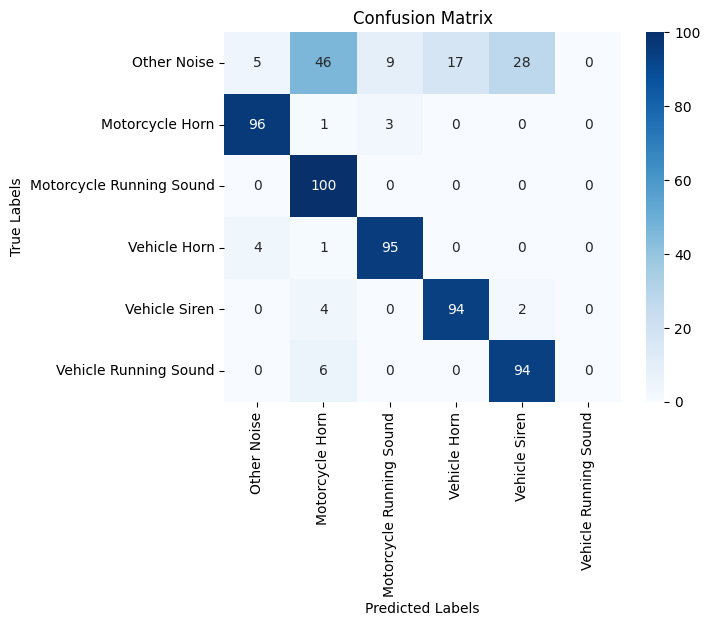

In [206]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true_labels_combined, y_pred_labels_ood_combined, target_names=english_labels))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true_labels_combined, y_pred_labels_ood_combined)
print(cm)

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Label Encoder Classes:  ['기타소음' '이륜차경적' '이륜차주행음' '차량경적' '차량사이렌' '차량주행음']
Predicted Labels Sample:  [0 0 0 0 0 0 0 0 0 0]
True Labels Sample:  [1 1 1 1 1 1 1 1 1 1]


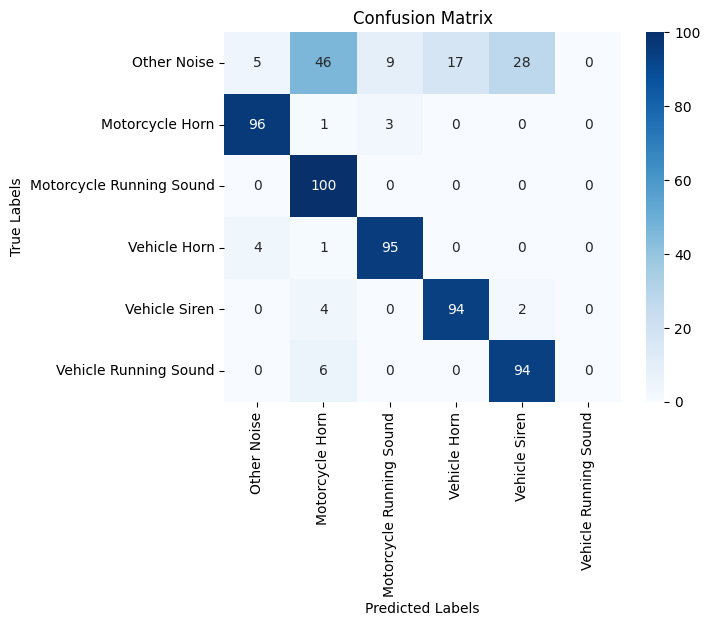

Classification Report:
                          precision    recall  f1-score   support

             Other Noise       0.05      0.05      0.05       105
         Motorcycle Horn       0.01      0.01      0.01       100
Motorcycle Running Sound       0.00      0.00      0.00       100
            Vehicle Horn       0.00      0.00      0.00       100
           Vehicle Siren       0.02      0.02      0.02       100
   Vehicle Running Sound       0.00      0.00      0.00       100

                accuracy                           0.01       605
               macro avg       0.01      0.01      0.01       605
            weighted avg       0.01      0.01      0.01       605



/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [207]:
# 라벨 매핑 확인
print("Label Encoder Classes: ", label_encoder.classes_)  # 인코딩된 클래스 확인
print("Predicted Labels Sample: ", y_pred_labels_ood_combined[:10])  # 예측된 레이블 샘플
print("True Labels Sample: ", y_true_ood[:10])  # 실제 레이블 샘플

# 혼동 행렬을 영어 레이블로 변환된 값으로 표시
english_labels = [label_mapping[label] for label in label_encoder.classes_]

# 혼동 행렬 계산
cm = confusion_matrix(y_true_ood, y_pred_labels_ood_combined)

# 혼동 행렬 시각화
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report (영어 레이블 적용)
print("Classification Report:")
print(classification_report(y_true_ood, y_pred_labels_ood_combined, target_names=english_labels))


변환된 y_true_ood 고유값: [0 1 2 3 4 5]
인코딩된 클래스 매핑: {0: '기타소음', 1: '이륜차경적', 2: '이륜차주행음', 3: '차량경적', 4: '차량사이렌', 5: '차량주행음'}
19/19 [==============================] - 0s 8ms/step
Classification Report:
                          precision    recall  f1-score   support

             Other Noise       0.50      0.04      0.07       105
         Motorcycle Horn       0.05      0.01      0.02       100
Motorcycle Running Sound       0.00      0.00      0.00       100
            Vehicle Horn       0.00      0.00      0.00       100
           Vehicle Siren       0.12      0.01      0.02       100
   Vehicle Running Sound       0.17      0.94      0.29       100

                accuracy                           0.17       605
               macro avg       0.14      0.17      0.07       605
            weighted avg       0.14      0.17      0.07       605

Confusion Matrix:
[[ 4 10  7  3  4 77]
 [ 0  1  1  0  0 98]
 [ 0  3  0  0  0 97]
 [ 4  1 11  0  0 84]
 [ 0  1  0  0  1 98]
 [ 0  3  0  0  3 94

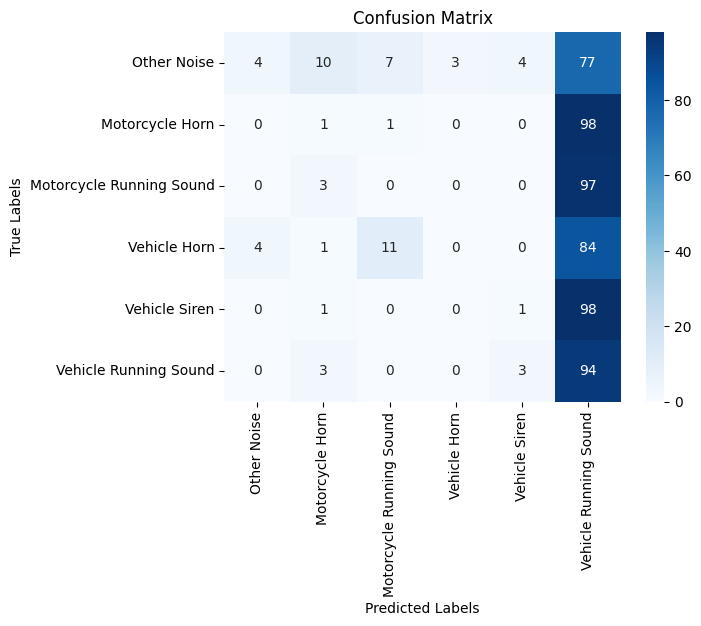

In [213]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# 데이터 준비 (df_balanced_odd_sampled 사용)
mfcc_columns = df_balanced_odd_sampled.columns[-51:-1]
X_test_ood = df_balanced_odd_sampled[mfcc_columns].values
y_true_ood_str = df_balanced_odd_sampled['ood_label'].values

# 레이블 인코딩 순서 조정
labels = ['기타소음', '이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음']
label_encoder = LabelEncoder()
label_encoder.fit(labels)
y_true_ood = label_encoder.transform(df_balanced_odd_sampled['ood_label'])

# 변환된 고유값 확인
print("변환된 y_true_ood 고유값:", np.unique(y_true_ood))
print("인코딩된 클래스 매핑:", dict(enumerate(label_encoder.classes_)))

# 모델 예측 (resnet_model을 사용)
y_pred_combined = resnet_model.predict(X_test_ood)

# 모델 불확실성 기반 OOD 탐지 (예시: 예측 확률의 분산 사용)
pred_variance = np.var(y_pred_combined, axis=1)
ood_threshold = 0.1  # 불확실성 임계값 조정

# OOD 예측: 분산이 임계값 이상이면 '기타 소음'으로 분류
y_pred_labels_combined = np.argmax(y_pred_combined, axis=1)
y_pred_labels_ood_combined = np.where(pred_variance > ood_threshold, 5, y_pred_labels_combined)  # 5는 '기타 소음' 클래스

# OOD 라벨 변환 (실제 레이블은 변경하지 않음)
y_true_labels_combined = np.argmax(to_categorical(y_true_ood, num_classes=len(label_encoder.classes_)), axis=1)  # 원-핫 인코딩 수행

# 영어 레이블 매핑 (한글 -> 영어)
label_mapping = {
    '기타소음': 'Other Noise',
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound'
}

# 혼동 행렬 시각화 시 사용할 영어 레이블
english_labels = [label_mapping[label] for label in label_encoder.classes_]

# Classification Report
print("Classification Report:")
print(classification_report(y_true_labels_combined, y_pred_labels_ood_combined, target_names=english_labels))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true_labels_combined, y_pred_labels_ood_combined)
print(cm)

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [209]:
# 모델 예측 결과 확인
y_pred_labels_combined = np.argmax(y_pred_combined, axis=1)
print("모델 예측 결과 분포:", np.bincount(y_pred_labels_combined))

모델 예측 결과 분포: [105 158 107 111 124]


In [210]:
# 클래스 매핑 확인
for i in range(len(label_encoder.classes_)):
    print(f"레이블 인코딩: {i} -> {label_encoder.classes_[i]}")

# 모델 예측 결과 확인
y_pred_labels_combined = np.argmax(y_pred_combined, axis=1)
print("모델 예측 결과 분포:", np.bincount(y_pred_labels_combined))

# 예측 결과와 실제 레이블 비교
for i in range(len(y_true_ood)):
    print(f"예측: {y_pred_labels_combined[i]}, 실제: {y_true_ood[i]}")

레이블 인코딩: 0 -> 기타소음
레이블 인코딩: 1 -> 이륜차경적
레이블 인코딩: 2 -> 이륜차주행음
레이블 인코딩: 3 -> 차량경적
레이블 인코딩: 4 -> 차량사이렌
레이블 인코딩: 5 -> 차량주행음
모델 예측 결과 분포: [105 158 107 111 124]
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 2, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 2, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 1, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예측: 0, 실제: 1
예

In [211]:
# 모델 출력 레이블 순서 확인
print("모델 출력 레이블 순서:", resnet_model.layers[-1].activation.__name__)

모델 출력 레이블 순서: softmax


In [217]:
# 훈련 데이터에서 카테고리 추출
categories = df_combined['category_03'].astype('category').cat.categories

# 라벨과 인코딩 매핑 출력
label_to_code = {label: code for code, label in enumerate(categories)}
print("모델의 라벨 인코딩 매핑:")
for label, code in label_to_code.items():
    print(f"{label}: {code}")


모델의 라벨 인코딩 매핑:
이륜차경적: 0
이륜차주행음: 1
차량경적: 2
차량사이렌: 3
차량주행음: 4


### 2) 최종 OOD 탐지 함수

모델의 입력 형태: (None, 50, 1)
입력 데이터의 형태: (605, 50, 1)
19/19 [==============================] - 0s 8ms/step
Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.96      0.98       100
Motorcycle Running Sound       0.78      0.84      0.81       100
            Vehicle Horn       1.00      0.53      0.69       100
           Vehicle Siren       0.91      0.91      0.91       100
   Vehicle Running Sound       0.88      0.79      0.83       100
             Other Noise       0.39      0.59      0.47       105

                accuracy                           0.77       605
               macro avg       0.83      0.77      0.78       605
            weighted avg       0.82      0.77      0.78       605



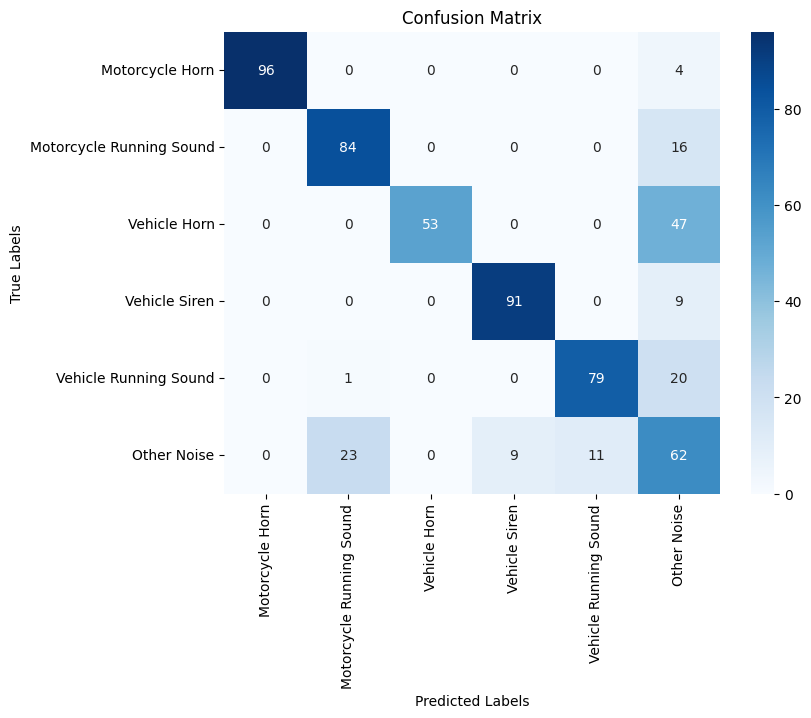

In [229]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 모델 로드
resnet_model = load_model('resnet_model_mfcc50.h5')

# 2. 입력 데이터 준비
# OOD 데이터의 라벨 시리즈
y_true_ood_str = df_balanced_odd_sampled['ood_label']

# 모델의 라벨 인코딩 매핑을 사용하여 인코딩
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}

# '기타소음' 클래스에 새로운 인덱스 할당
label_to_code['기타소음'] = 5

# 실제 라벨 인코딩
y_true_ood = y_true_ood_str.map(label_to_code)

# 정확한 MFCC 컬럼 선택
mfcc_columns = [col for col in df_balanced_odd_sampled.columns if 'mfcc' in col]

# 입력 데이터 준비
X_test_ood = df_balanced_odd_sampled[mfcc_columns].values
X_test_ood = X_test_ood.reshape((X_test_ood.shape[0], X_test_ood.shape[1], 1))

# 모델의 입력 형태와 일치하는지 확인
print(f"모델의 입력 형태: {resnet_model.input_shape}")
print(f"입력 데이터의 형태: {X_test_ood.shape}")

# 3. 모델 예측
y_pred_probs = resnet_model.predict(X_test_ood)

# 4. OOD 탐지
# 예측 확률의 최대값 계산
max_probs = np.max(y_pred_probs, axis=1)

# 임계값 설정 (예시: 0.99, 필요에 따라 조정)
ood_threshold = 0.99

# 예측 라벨 초기화
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 최대 확률이 임계값보다 낮은 경우 '기타소음'(인덱스 5)으로 분류
y_pred_labels_ood = np.where(max_probs < ood_threshold, 5, y_pred_labels)

# 5. 클래스 인덱스에 대응하는 클래스 이름 리스트
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]  # 인덱스 순서대로 라벨 정렬

# 영어 라벨 매핑 (시각화 및 리포트를 위한 용도)
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Other Noise'
}
english_labels = [label_mapping[label] for label in labels_in_order]

# 6. 분류 리포트 출력
print("Classification Report:")
print(classification_report(y_true_ood, y_pred_labels_ood, target_names=english_labels))

# 7. 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_true_ood, y_pred_labels_ood)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 3) OOD 탐지성능 개선

> 개선사항
* 코드 개선 사항 설명
1. 엔트로피 기반의 불확실성 측정: 예측 확률 분포의 엔트로피를 계산하여 모델의 불확실성을 정량화했습니다. 엔트로피가 높을수록 모델의 예측이 불확실하다는 의미입니다.
2. 임계값 자동 결정: ROC 커브와 AUC를 활용하여 OOD 탐지 성능을 평가하고, Youden's J 통계를 통해 최적의 임계값을 자동으로 선택했습니다.
3. 시각화 강화:
    * 엔트로피 분포 히스토그램: 예측된 엔트로피 값을 시각화하여 불확실성의 분포를 파악했습니다.
    * ROC 커브 시각화: OOD 탐지의 성능을 한눈에 파악할 수 있도록 ROC 커브를 그렸습니다.
    * 혼동 행렬: 모델의 예측 결과를 상세히 분석할 수 있도록 혼동 행렬을 시각화했습니다.

4. 샘플별 상세 결과 출력: 일부 샘플에 대해 실제 라벨, 예측 라벨, 엔트로피 값을 출력하여 모델의 예측 특징을 구체적으로 파악했습니다.

모델의 입력 형태: (None, 50, 1)
입력 데이터의 형태: (605, 50, 1)
19/19 [==============================] - 0s 7ms/step


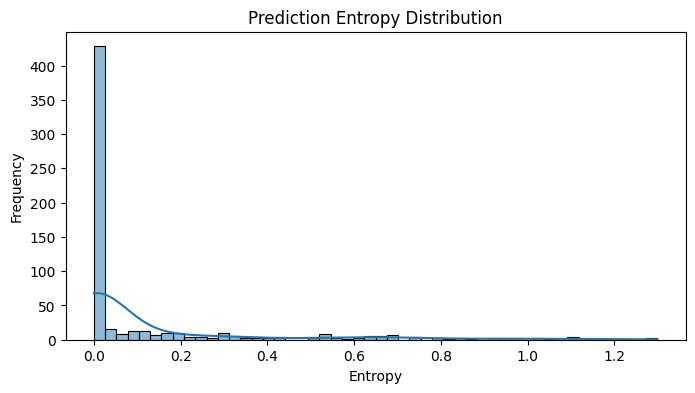

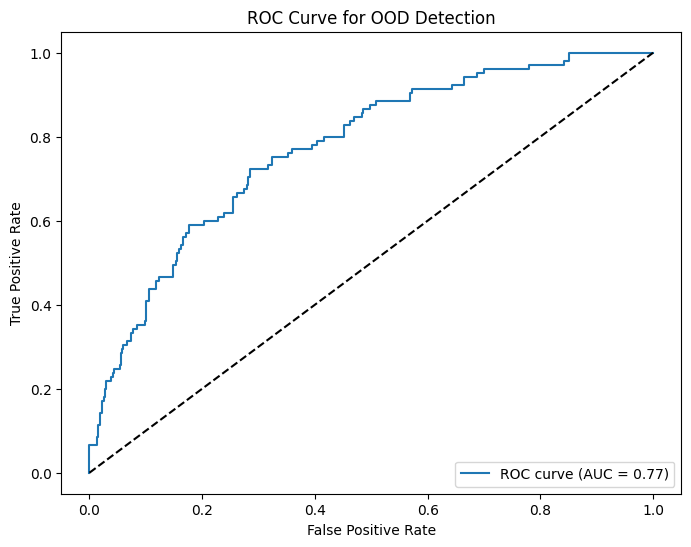

선택된 최적 임계값 (Entropy 기준): 0.0128

Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       1.00      0.95      0.97       100
Motorcycle Running Sound       0.85      0.73      0.78       100
            Vehicle Horn       1.00      0.46      0.63       100
           Vehicle Siren       0.90      0.82      0.86       100
   Vehicle Running Sound       0.87      0.61      0.72       100
             Other Noise       0.35      0.71      0.47       105

                accuracy                           0.71       605
               macro avg       0.83      0.71      0.74       605
            weighted avg       0.82      0.71      0.74       605



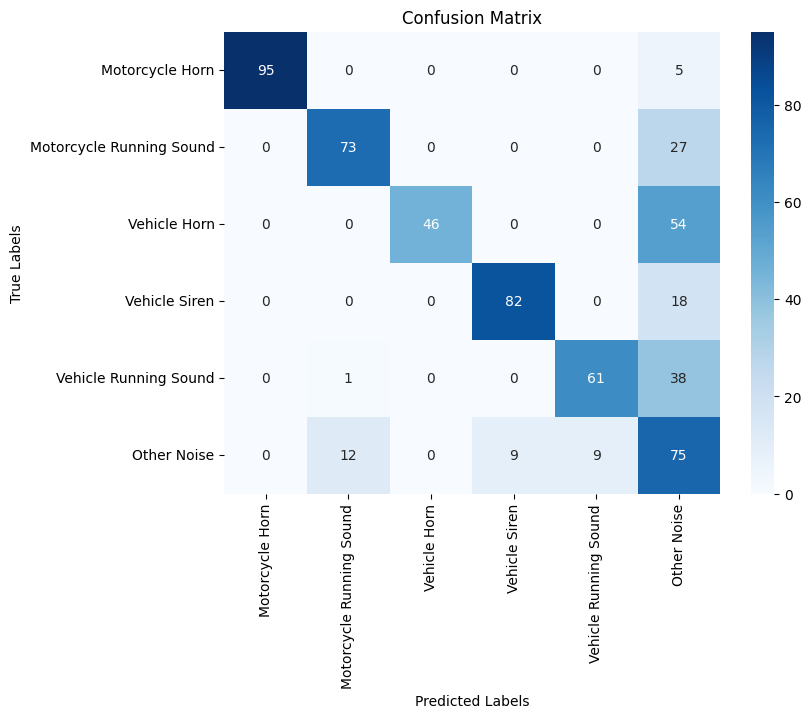

샘플 0: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 1: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 2: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 3: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 4: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 5: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 6: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 7: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 8: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000
샘플 9: 실제 라벨 = 이륜차경적, 예측 라벨 = 이륜차경적, 엔트로피 = 0.0000


In [230]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# 1. 모델 로드
resnet_model = load_model('resnet_model_mfcc50.h5')

# 2. 입력 데이터 준비
# OOD 데이터의 라벨 시리즈
y_true_ood_str = df_balanced_odd_sampled['ood_label']

# 모델의 라벨 인코딩 매핑을 사용하여 인코딩
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}

# '기타소음' 클래스에 새로운 인덱스 할당
label_to_code['기타소음'] = 5

# 실제 라벨 인코딩
y_true_ood = y_true_ood_str.map(label_to_code).values

# MFCC 특징 컬럼 선택 (1번부터 50번까지)
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test_ood = df_balanced_odd_sampled[mfcc_columns].values
X_test_ood = X_test_ood.reshape((X_test_ood.shape[0], X_test_ood.shape[1], 1))

# 모델의 입력 형태와 일치하는지 확인
print(f"모델의 입력 형태: {resnet_model.input_shape}")
print(f"입력 데이터의 형태: {X_test_ood.shape}")

# 3. 모델 예측
y_pred_probs = resnet_model.predict(X_test_ood)

# 4. 엔트로피 기반 OOD 탐지
# 예측 확률의 엔트로피 계산
pred_entropy = entropy(y_pred_probs, axis=1)

# 엔트로피 분포 시각화
plt.figure(figsize=(8, 4))
sns.histplot(pred_entropy, bins=50, kde=True)
plt.title('Prediction Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

# 5. OOD 탐지 임계값 결정
# 실제 OOD 여부 (기타소음인 경우 True)
is_ood = (y_true_ood == label_to_code['기타소음'])

# ROC 커브를 통한 임계값 선택
fpr, tpr, thresholds = roc_curve(is_ood, pred_entropy)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for OOD Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 최적의 임계값 선택 (Youden's J statistic)
j_scores = tpr - fpr
j_ordered = sorted(zip(j_scores, thresholds))
best_threshold = j_ordered[-1][1]
print(f"선택된 최적 임계값 (Entropy 기준): {best_threshold:.4f}")

# 6. OOD 탐지 적용
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 엔트로피가 임계값보다 큰 경우 '기타소음'(인덱스 5)으로 분류
y_pred_labels_ood = np.where(pred_entropy > best_threshold, label_to_code['기타소음'], y_pred_labels)

# 7. 클래스 인덱스에 대응하는 클래스 이름 리스트
index_to_label = {v: k for k, v in label_to_code.items()}
labels_in_order = [index_to_label[i] for i in range(len(index_to_label))]  # 인덱스 순서대로 라벨 정렬

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    '기타소음': 'Other Noise'
}
english_labels = [label_mapping[label] for label in labels_in_order]

# 8. 분류 리포트 출력
print("\nClassification Report:")
print(classification_report(y_true_ood, y_pred_labels_ood, target_names=english_labels))

# 9. 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_true_ood, y_pred_labels_ood)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 10. 샘플별 예측 결과 확인
for i in range(10):
    true_label = index_to_label[y_true_ood[i]]
    pred_label = index_to_label[y_pred_labels_ood[i]]
    entropy_value = pred_entropy[i]
    print(f"샘플 {i}: 실제 라벨 = {true_label}, 예측 라벨 = {pred_label}, 엔트로피 = {entropy_value:.4f}")


### 4) 확신도 임계값 설정 (Confidence Thresholding)

19/19 [==============================] - 0s 7ms/step
Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       0.99      0.96      0.97       100
Motorcycle Running Sound       0.67      0.97      0.80       100
            Vehicle Horn       0.94      0.93      0.93       100
           Vehicle Siren       0.86      0.94      0.90       100
   Vehicle Running Sound       0.78      0.92      0.84       100
                 Unknown       0.58      0.21      0.31       105

                accuracy                           0.82       605
               macro avg       0.80      0.82      0.79       605
            weighted avg       0.80      0.82      0.79       605



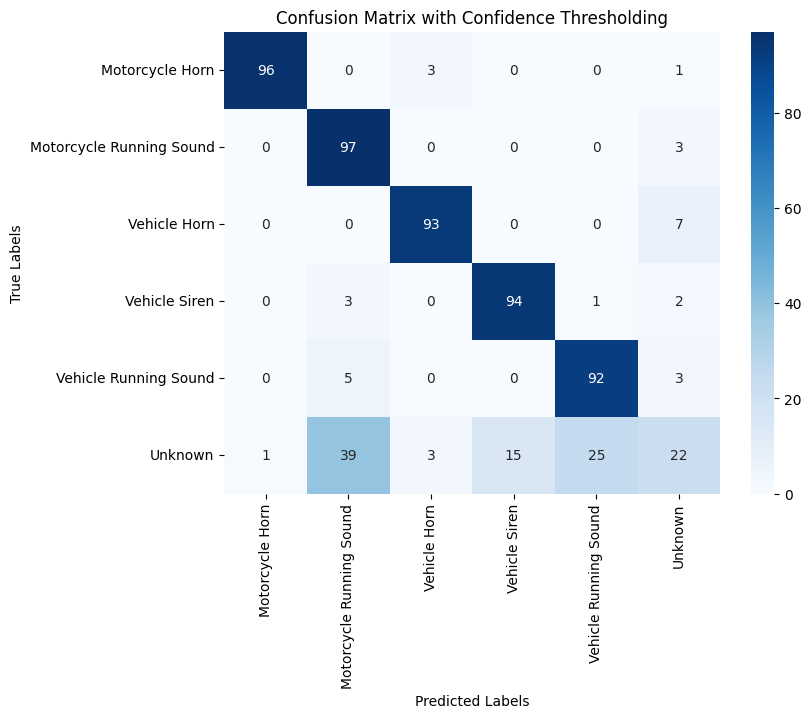

In [231]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 모델 로드
resnet_model = load_model('resnet_model_mfcc50.h5')

# 2. 입력 데이터 준비
# 실제 라벨
y_true_str = df_balanced_odd_sampled['ood_label']

# 모델의 라벨 인코딩 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}

# 실제 라벨 인코딩 (모델에 없는 클래스는 NaN으로 처리)
y_true = y_true_str.map(label_to_code)

# 'Unknown' 클래스 인덱스 설정
unknown_label_index = 5

# 입력 데이터 준비 (MFCC 특징 사용)
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 3. 모델 예측
y_pred_probs = resnet_model.predict(X_test)

# 4. 확신도 임계값 설정
confidence_threshold = 0.7  # 예시로 0.7로 설정

# 최대 예측 확률 및 예측 라벨 계산
max_probs = np.max(y_pred_probs, axis=1)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 확신도가 임계값보다 낮은 경우 'Unknown' 클래스로 분류
y_pred_labels_conf = np.where(max_probs >= confidence_threshold, y_pred_labels, unknown_label_index)

# 5. 실제 라벨에서 NaN 처리된 부분을 'Unknown' 클래스로 변경
y_true = y_true.fillna(unknown_label_index).astype(int)

# 6. 클래스 인덱스와 라벨 매핑
index_to_label = {
    0: '이륜차경적',
    1: '이륜차주행음',
    2: '차량경적',
    3: '차량사이렌',
    4: '차량주행음',
    5: 'Unknown'  # 'Unknown' 클래스 추가
}

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    'Unknown': 'Unknown'
}
english_labels = [label_mapping[index_to_label[i]] for i in range(len(index_to_label))]

# 7. 분류 리포트 출력
print("Classification Report:")
print(classification_report(y_true, y_pred_labels_conf, target_names=english_labels))

# 8. 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred_labels_conf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix with Confidence Thresholding')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### 5) 이상치 탐지 모델 사용 (Anomaly Detection)

Anomaly Detection Report:
              precision    recall  f1-score   support

     Anomaly       0.00      0.00      0.00       105
      Normal       0.81      0.91      0.86       500

    accuracy                           0.75       605
   macro avg       0.41      0.46      0.43       605
weighted avg       0.67      0.75      0.71       605



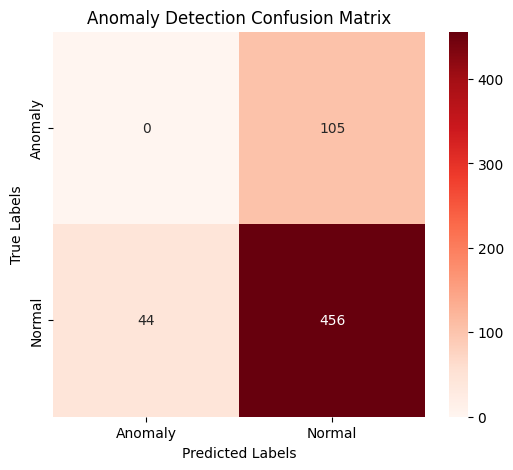

In [232]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비
# 훈련 데이터 (정상 데이터만 사용)
X_train_normal = df_combined[df_combined['category_03'].isin(label_to_code.keys())]
X_train_features = X_train_normal[mfcc_columns].values

# 테스트 데이터
X_test_features = df_balanced_odd_sampled[mfcc_columns].values
X_test_labels_str = df_balanced_odd_sampled['ood_label']

# 2. 이상치 탐지 모델 학습
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train_features)

# 3. 이상치 탐지 예측
anomaly_scores = iso_forest.decision_function(X_test_features)
anomaly_labels = iso_forest.predict(X_test_features)
# 이상치인 경우 -1, 정상인 경우 1로 반환됨

# 4. 결과 처리
# 실제 라벨 인코딩 (모델이 모르는 클래스는 -1로 설정)
y_true_anomaly = X_test_labels_str.map(lambda x: -1 if x not in label_to_code else 1)

# 5. 분류 리포트 출력
print("Anomaly Detection Report:")
print(classification_report(y_true_anomaly, anomaly_labels, target_names=['Anomaly', 'Normal']))

# 6. 혼동 행렬 시각화
cm = confusion_matrix(y_true_anomaly, anomaly_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title('Anomaly Detection Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

19/19 [==============================] - 0s 7ms/step
Classification Report:
                          precision    recall  f1-score   support

         Motorcycle Horn       0.88      0.67      0.76       100
Motorcycle Running Sound       0.63      1.00      0.78       100
            Vehicle Horn       0.87      0.80      0.83       100
           Vehicle Siren       0.85      0.94      0.89       100
   Vehicle Running Sound       0.76      0.94      0.84       100
                 Unknown       0.00      0.00      0.00       105

                accuracy                           0.72       605
               macro avg       0.66      0.72      0.68       605
            weighted avg       0.66      0.72      0.68       605



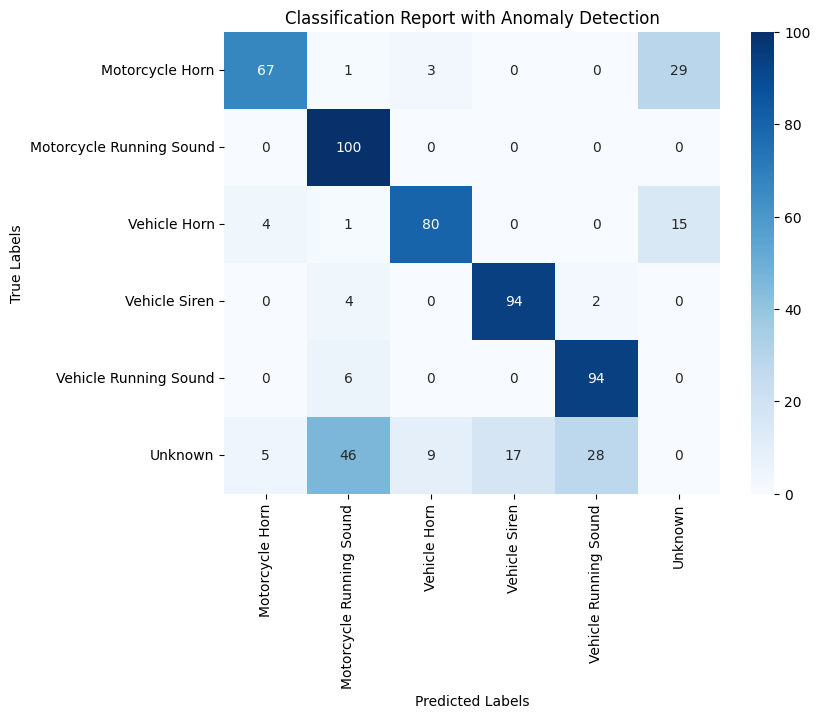

샘플 0: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Motorcycle Horn
샘플 1: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Unknown
샘플 2: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Motorcycle Horn
샘플 3: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Motorcycle Horn
샘플 4: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Unknown
샘플 5: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Motorcycle Horn
샘플 6: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Motorcycle Horn
샘플 7: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Motorcycle Horn
샘플 8: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Unknown
샘플 9: 실제 라벨 = Motorcycle Horn, 예측 라벨 = Motorcycle Horn


In [233]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비

# 1.1. 모델 로드
resnet_model = load_model('resnet_model_mfcc50.h5')

# 1.2. 라벨 인코딩 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}

# 1.3. 'Unknown' 클래스 인덱스 설정
unknown_label_index = 5

# 1.4. 입력 데이터 준비
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # CNN 입력용
X_test_iforest = X_test  # Isolation Forest 입력용

# 1.5. 실제 라벨 인코딩
y_true_str = df_balanced_odd_sampled['ood_label']
y_true = y_true_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values  # 모르는 클래스는 'Unknown'으로

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    'Unknown': 'Unknown'
}
english_labels = [label_mapping[label] for label in list(label_to_code.keys()) + ['Unknown']]

# 2. 분류 모델 예측
y_pred_probs = resnet_model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 3. 이상치 탐지 모델 학습

# 3.1. 정상 데이터(훈련 데이터) 준비
X_train_normal = df_combined[df_combined['category_03'].isin(label_to_code.keys())]
X_train_features = X_train_normal[mfcc_columns].values

# 3.2. Isolation Forest 모델 학습
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train_features)

# 4. 이상치 탐지 예측
anomaly_labels = iso_forest.predict(X_test_iforest)
# 이상치인 경우 -1, 정상인 경우 1로 반환됨

# 5. 이상치 탐지 결과와 분류 모델 예측 결과 결합

# 5.1. 이상치인 경우 예측 라벨을 'Unknown' 클래스로 변경
y_pred_labels_combined = np.where(anomaly_labels == -1, unknown_label_index, y_pred_labels)

# 6. 성능 평가

# 6.1. 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_true, y_pred_labels_combined, target_names=english_labels))

# 6.2. 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred_labels_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Classification Report with Anomaly Detection')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 7. 샘플별 예측 결과 확인 (선택사항)
for i in range(10):
    true_label = label_mapping[y_true_str.iloc[i]] if y_true_str.iloc[i] in label_mapping else 'Unknown'
    pred_label = english_labels[y_pred_labels_combined[i]]
    print(f"샘플 {i}: 실제 라벨 = {true_label}, 예측 라벨 = {pred_label}")


19/19 [==============================] - 0s 7ms/step
Anomaly Detection Report:
              precision    recall  f1-score   support

     Anomaly       0.04      0.03      0.03       105
      Normal       0.81      0.86      0.83       500

    accuracy                           0.71       605
   macro avg       0.42      0.44      0.43       605
weighted avg       0.67      0.71      0.69       605


Classification Report with Anomaly Detection:
                          precision    recall  f1-score   support

         Motorcycle Horn       0.86      0.48      0.62       100
Motorcycle Running Sound       0.64      1.00      0.78       100
            Vehicle Horn       0.86      0.73      0.79       100
           Vehicle Siren       0.84      0.92      0.88       100
   Vehicle Running Sound       0.76      0.94      0.84       100
                 Unknown       0.04      0.03      0.03       105

                accuracy                           0.68       605
               ma

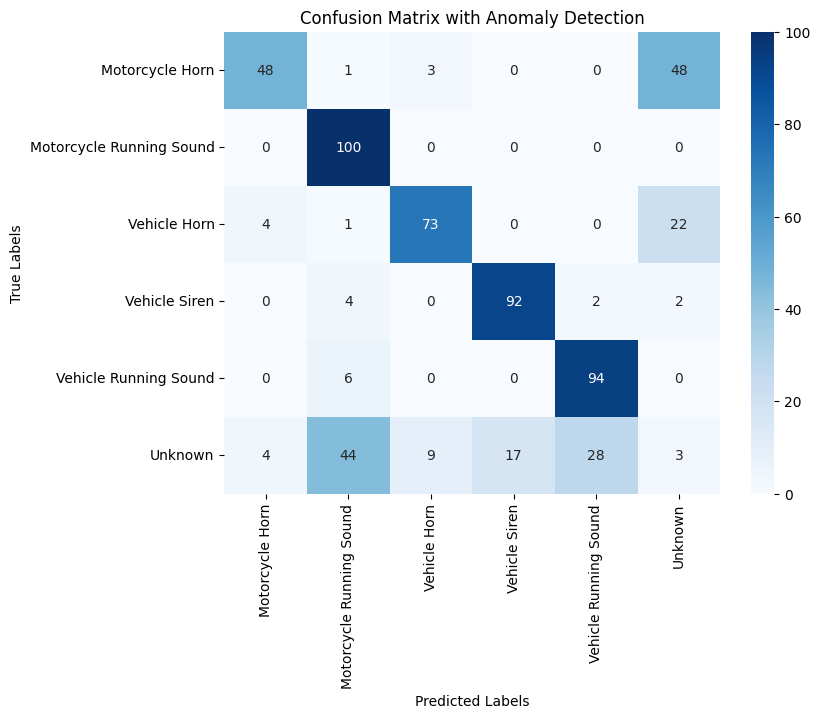

In [234]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비

# 1.1. 모델 로드
resnet_model = load_model('resnet_model_mfcc50.h5')

# 1.2. 라벨 인코딩 매핑
label_to_code = {
    '이륜차경적': 0,
    '이륜차주행음': 1,
    '차량경적': 2,
    '차량사이렌': 3,
    '차량주행음': 4
}

# 1.3. 'Unknown' 클래스 인덱스 설정
unknown_label_index = 5

# 1.4. 입력 데이터 준비
mfcc_columns = [f'mfcc_{i}' for i in range(1, 51)]
X_test = df_balanced_odd_sampled[mfcc_columns].values
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # CNN 입력용
X_test_iforest = X_test  # Isolation Forest 입력용

# 1.5. 실제 라벨 인코딩
y_true_str = df_balanced_odd_sampled['ood_label']
y_true = y_true_str.map(lambda x: label_to_code.get(x, unknown_label_index)).values  # 모르는 클래스는 'Unknown'으로

# 영어 라벨 매핑
label_mapping = {
    '이륜차경적': 'Motorcycle Horn',
    '이륜차주행음': 'Motorcycle Running Sound',
    '차량경적': 'Vehicle Horn',
    '차량사이렌': 'Vehicle Siren',
    '차량주행음': 'Vehicle Running Sound',
    'Unknown': 'Unknown'
}
english_labels = [label_mapping[label] for label in list(label_to_code.keys()) + ['Unknown']]

# 2. 분류 모델 예측
y_pred_probs = resnet_model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# 3. 특징 스케일링 및 이상치 탐지 모델 학습

# 3.1. 정상 데이터(훈련 데이터) 준비
X_train_normal = df_combined[df_combined['category_03'].isin(label_to_code.keys())]
X_train_features = X_train_normal[mfcc_columns].values

# 3.2. 특징 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_features_scaled = scaler.fit_transform(X_train_features)
X_test_features_scaled = scaler.transform(X_test_iforest)

# 3.3. 이상치 탐지 모델 학습
from sklearn.ensemble import IsolationForest

# 실제 이상치 비율 계산
contamination_rate = y_true_str.value_counts(normalize=True).get('기타소음', 0.05)  # 기본값 0.05

iso_forest = IsolationForest(n_estimators=100, contamination=contamination_rate, random_state=42)
iso_forest.fit(X_train_features_scaled)

# 4. 이상치 탐지 예측
anomaly_labels = iso_forest.predict(X_test_features_scaled)
# 이상치인 경우 -1, 정상인 경우 1로 반환됨

# 5. 이상치 탐지 모델의 성능 평가
y_true_anomaly = np.where(y_true == unknown_label_index, -1, 1)

print("Anomaly Detection Report:")
print(classification_report(y_true_anomaly, anomaly_labels, target_names=['Anomaly', 'Normal']))

# 6. 이상치 탐지 결과와 분류 모델 예측 결과 결합

# 6.1. 이상치인 경우 예측 라벨을 'Unknown' 클래스로 변경
y_pred_labels_combined = np.where(anomaly_labels == -1, unknown_label_index, y_pred_labels)

# 7. 성능 평가

# 7.1. 분류 보고서 출력
print("\nClassification Report with Anomaly Detection:")
print(classification_report(y_true, y_pred_labels_combined, target_names=english_labels))

# 7.2. 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred_labels_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=english_labels, yticklabels=english_labels)
plt.title('Confusion Matrix with Anomaly Detection')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
